In [1]:
import torch

torch.cuda.is_available()

True

In [11]:
import os
import numpy as np

subset_size = 10
# num_exps = 15
sc_options = ['False'] * 7

for sc_choice in sc_options:
    os.system(f"python main.py -model 'efficientnet_b1' -b 4 -bs 64 -s 1.16 -ds 'CIFAR100' -sn {subset_size} -sc '{sc_choice}'")

Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 795.57it/s]


The quantization error of layer 0 is 85.74182891845703.
The relative quantization error of layer 0 is 0.0193336084485054.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 785.97it/s]


The quantization error of layer 1 is 926.7498779296875.
The relative quantization error of layer 1 is 0.05214890465140343.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2342.63it/s]


The quantization error of layer 2 is 241.62966918945312.
The relative quantization error of layer 2 is 0.056438229978084564.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 245.23it/s]


The quantization error of layer 3 is 3246.97265625.
The relative quantization error of layer 3 is 0.09866929799318314.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 228.09it/s]


The quantization error of layer 4 is 1455.469970703125.
The relative quantization error of layer 4 is 0.050248708575963974.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 492.66it/s]


The quantization error of layer 5 is 605.4962158203125.
The relative quantization error of layer 5 is 0.20908458530902863.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2443.17it/s]


The quantization error of layer 6 is 268.2049865722656.
The relative quantization error of layer 6 is 0.24077428877353668.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 206.39it/s]


The quantization error of layer 7 is 1070.3365478515625.
The relative quantization error of layer 7 is 0.23224137723445892.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 523.44it/s]


The quantization error of layer 8 is 881.5758056640625.
The relative quantization error of layer 8 is 0.2682408094406128.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2597.22it/s]


The quantization error of layer 9 is 558.8804931640625.
The relative quantization error of layer 9 is 0.2788780629634857.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 259.36it/s]


The quantization error of layer 10 is 1583.4613037109375.
The relative quantization error of layer 10 is 0.2390093058347702.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 286.21it/s]


The quantization error of layer 11 is 1720.0968017578125.
The relative quantization error of layer 11 is 0.30832770466804504.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2616.08it/s]


The quantization error of layer 12 is 1220.9527587890625.
The relative quantization error of layer 12 is 0.31049513816833496.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 911.27it/s]


The quantization error of layer 13 is 1522.4935302734375.
The relative quantization error of layer 13 is 0.21988138556480408.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.12it/s]


The quantization error of layer 14 is 2102.43994140625.
The relative quantization error of layer 14 is 0.29792165756225586.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2046.02it/s]


The quantization error of layer 15 is 2059.908447265625.
The relative quantization error of layer 15 is 0.2657082974910736.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2602.24it/s]


The quantization error of layer 16 is 550.976318359375.
The relative quantization error of layer 16 is 0.24154314398765564.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 757.18it/s]


The quantization error of layer 17 is 1239.763916015625.
The relative quantization error of layer 17 is 0.4103192687034607.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2062.97it/s]


The quantization error of layer 18 is 1803.035400390625.
The relative quantization error of layer 18 is 0.30779922008514404.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2542.83it/s]


The quantization error of layer 19 is 369.48974609375.
The relative quantization error of layer 19 is 0.26304203271865845.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 931.40it/s]


The quantization error of layer 20 is 1241.2994384765625.
The relative quantization error of layer 20 is 0.3101326823234558.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2062.76it/s]


The quantization error of layer 21 is 2030.468505859375.
The relative quantization error of layer 21 is 0.33349698781967163.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2607.29it/s]


The quantization error of layer 22 is 436.91571044921875.
The relative quantization error of layer 22 is 0.28087347745895386.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 929.49it/s]


The quantization error of layer 23 is 1042.996826171875.
The relative quantization error of layer 23 is 0.40599825978279114.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1470.28it/s]


The quantization error of layer 24 is 3440.09423828125.
The relative quantization error of layer 24 is 0.37995585799217224.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2584.28it/s]


The quantization error of layer 25 is 639.927734375.
The relative quantization error of layer 25 is 0.332124799489975.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1509.86it/s]


The quantization error of layer 26 is 1385.7718505859375.
The relative quantization error of layer 26 is 0.3762155771255493.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 548.81it/s]


The quantization error of layer 27 is 3545.99169921875.
The relative quantization error of layer 27 is 0.37376007437705994.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2608.09it/s]


The quantization error of layer 28 is 1377.7203369140625.
The relative quantization error of layer 28 is 0.34219202399253845.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2589.20it/s]


The quantization error of layer 29 is 268.1658630371094.
The relative quantization error of layer 29 is 0.18137520551681519.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1509.84it/s]


The quantization error of layer 30 is 978.4284057617188.
The relative quantization error of layer 30 is 0.44538143277168274.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2571.61it/s]


The quantization error of layer 31 is 1545.2574462890625.
The relative quantization error of layer 31 is 0.36239543557167053.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2598.29it/s]


The quantization error of layer 32 is 302.41851806640625.
The relative quantization error of layer 32 is 0.22469070553779602.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1499.29it/s]


The quantization error of layer 33 is 884.884521484375.
The relative quantization error of layer 33 is 0.47154852747917175.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2595.43it/s]


The quantization error of layer 34 is 1703.8177490234375.
The relative quantization error of layer 34 is 0.41644906997680664.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2598.14it/s]


The quantization error of layer 35 is 246.81912231445312.
The relative quantization error of layer 35 is 0.20276424288749695.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1492.02it/s]


The quantization error of layer 36 is 1088.9508056640625.
The relative quantization error of layer 36 is 0.5187838673591614.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2478.06it/s]


The quantization error of layer 37 is 1767.364990234375.
The relative quantization error of layer 37 is 0.43796366453170776.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2604.91it/s]


The quantization error of layer 38 is 217.9065704345703.
The relative quantization error of layer 38 is 0.2163715660572052.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1495.95it/s]


The quantization error of layer 39 is 1335.671875.
The relative quantization error of layer 39 is 0.5107184648513794.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2592.06it/s]


The quantization error of layer 40 is 1849.03564453125.
The relative quantization error of layer 40 is 0.4272095859050751.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2598.07it/s]


The quantization error of layer 41 is 180.61155700683594.
The relative quantization error of layer 41 is 0.21890337765216827.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1501.07it/s]


The quantization error of layer 42 is 1480.8912353515625.
The relative quantization error of layer 42 is 0.5481473207473755.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2113.98it/s]


The quantization error of layer 43 is 2598.390869140625.
The relative quantization error of layer 43 is 0.46147212386131287.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2608.21it/s]


The quantization error of layer 44 is 163.39622497558594.
The relative quantization error of layer 44 is 0.2054506242275238.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2033.81it/s]


The quantization error of layer 45 is 917.9226684570312.
The relative quantization error of layer 45 is 0.42187780141830444.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 943.19it/s]


The quantization error of layer 46 is 2165.030029296875.
The relative quantization error of layer 46 is 0.47230225801467896.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2628.51it/s]


The quantization error of layer 47 is 413.78668212890625.
The relative quantization error of layer 47 is 0.3905577063560486.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2622.97it/s]


The quantization error of layer 48 is 110.21734619140625.
The relative quantization error of layer 48 is 0.10423797369003296.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2066.85it/s]


The quantization error of layer 49 is 527.4705200195312.
The relative quantization error of layer 49 is 0.6829478144645691.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2564.26it/s]


The quantization error of layer 50 is 431.5927734375.
The relative quantization error of layer 50 is 0.28109145164489746.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2659.71it/s]


The quantization error of layer 51 is 71.49744415283203.
The relative quantization error of layer 51 is 0.15072736144065857.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2137.44it/s]


The quantization error of layer 52 is 112.496337890625.
The relative quantization error of layer 52 is 0.7937270402908325.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2646.16it/s]


The quantization error of layer 53 is 32.23347091674805.
The relative quantization error of layer 53 is 0.1995307207107544.


Time used for quantization: 0:00:51.975492


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.866.
Top-5 accuracy of efficientnet_b1 is 0.985.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.99it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.935.
Top-5 accuracy of quantized efficientnet_b1 is 0.991.

Time used for evaluation: 0:00:04.014517

Sparsity: Org: 0.0, Quant: 0.4526
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 791.33it/s]


The quantization error of layer 0 is 89.92145538330078.
The relative quantization error of layer 0 is 0.01966514252126217.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 751.14it/s]


The quantization error of layer 1 is 901.846435546875.
The relative quantization error of layer 1 is 0.050424832850694656.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2201.55it/s]


The quantization error of layer 2 is 250.2135467529297.
The relative quantization error of layer 2 is 0.05483349785208702.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 228.11it/s]


The quantization error of layer 3 is 3467.5341796875.
The relative quantization error of layer 3 is 0.10348165035247803.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 218.78it/s]


The quantization error of layer 4 is 1467.900634765625.
The relative quantization error of layer 4 is 0.04893668368458748.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 521.02it/s]


The quantization error of layer 5 is 609.5599975585938.
The relative quantization error of layer 5 is 0.20366275310516357.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2385.39it/s]


The quantization error of layer 6 is 281.59539794921875.
The relative quantization error of layer 6 is 0.2322693020105362.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 212.68it/s]


The quantization error of layer 7 is 1056.9517822265625.
The relative quantization error of layer 7 is 0.21835660934448242.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 517.63it/s]


The quantization error of layer 8 is 953.7581176757812.
The relative quantization error of layer 8 is 0.2730053961277008.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2465.34it/s]


The quantization error of layer 9 is 602.256591796875.
The relative quantization error of layer 9 is 0.2903316915035248.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 243.89it/s]


The quantization error of layer 10 is 1707.3966064453125.
The relative quantization error of layer 10 is 0.2436588555574417.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 284.09it/s]


The quantization error of layer 11 is 1696.2415771484375.
The relative quantization error of layer 11 is 0.30046388506889343.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2444.86it/s]


The quantization error of layer 12 is 1196.881591796875.
The relative quantization error of layer 12 is 0.29182884097099304.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 796.82it/s]


The quantization error of layer 13 is 1517.6160888671875.
The relative quantization error of layer 13 is 0.2169886827468872.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.27it/s]


The quantization error of layer 14 is 2120.473388671875.
The relative quantization error of layer 14 is 0.2997933030128479.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2015.00it/s]


The quantization error of layer 15 is 2144.09619140625.
The relative quantization error of layer 15 is 0.269420862197876.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2528.66it/s]


The quantization error of layer 16 is 549.15576171875.
The relative quantization error of layer 16 is 0.2453746199607849.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 831.61it/s]


The quantization error of layer 17 is 1182.7845458984375.
The relative quantization error of layer 17 is 0.37839382886886597.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1994.34it/s]


The quantization error of layer 18 is 1783.4974365234375.
The relative quantization error of layer 18 is 0.29119759798049927.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2510.70it/s]


The quantization error of layer 19 is 382.0137023925781.
The relative quantization error of layer 19 is 0.25667256116867065.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 700.73it/s]


The quantization error of layer 20 is 1282.4365234375.
The relative quantization error of layer 20 is 0.31062284111976624.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2005.39it/s]


The quantization error of layer 21 is 1991.844482421875.
The relative quantization error of layer 21 is 0.3279138505458832.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2513.14it/s]


The quantization error of layer 22 is 459.89801025390625.
The relative quantization error of layer 22 is 0.2769721746444702.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 852.59it/s]


The quantization error of layer 23 is 1031.4771728515625.
The relative quantization error of layer 23 is 0.34951573610305786.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1447.56it/s]


The quantization error of layer 24 is 3333.079833984375.
The relative quantization error of layer 24 is 0.36597028374671936.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2533.50it/s]


The quantization error of layer 25 is 621.5042114257812.
The relative quantization error of layer 25 is 0.32092151045799255.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1497.91it/s]


The quantization error of layer 26 is 1352.49365234375.
The relative quantization error of layer 26 is 0.36661675572395325.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 510.69it/s]


The quantization error of layer 27 is 3416.512939453125.
The relative quantization error of layer 27 is 0.35419151186943054.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2537.00it/s]


The quantization error of layer 28 is 1375.2532958984375.
The relative quantization error of layer 28 is 0.33285966515541077.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2537.23it/s]


The quantization error of layer 29 is 266.5838623046875.
The relative quantization error of layer 29 is 0.17793220281600952.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1488.04it/s]


The quantization error of layer 30 is 974.3948974609375.
The relative quantization error of layer 30 is 0.4128090441226959.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2528.56it/s]


The quantization error of layer 31 is 1552.2459716796875.
The relative quantization error of layer 31 is 0.3653315007686615.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2526.43it/s]


The quantization error of layer 32 is 294.1053161621094.
The relative quantization error of layer 32 is 0.218885600566864.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1501.32it/s]


The quantization error of layer 33 is 855.3795166015625.
The relative quantization error of layer 33 is 0.46327680349349976.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2498.93it/s]


The quantization error of layer 34 is 1681.31494140625.
The relative quantization error of layer 34 is 0.3963925242424011.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2539.29it/s]


The quantization error of layer 35 is 240.85414123535156.
The relative quantization error of layer 35 is 0.20054297149181366.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1479.71it/s]


The quantization error of layer 36 is 1054.3699951171875.
The relative quantization error of layer 36 is 0.5267805457115173.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2496.34it/s]


The quantization error of layer 37 is 1762.9371337890625.
The relative quantization error of layer 37 is 0.3966190218925476.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2498.24it/s]


The quantization error of layer 38 is 206.14891052246094.
The relative quantization error of layer 38 is 0.20629440248012543.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1394.96it/s]


The quantization error of layer 39 is 1351.5533447265625.
The relative quantization error of layer 39 is 0.5066500306129456.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2534.52it/s]


The quantization error of layer 40 is 1822.76806640625.
The relative quantization error of layer 40 is 0.43228238821029663.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2524.88it/s]


The quantization error of layer 41 is 179.7353057861328.
The relative quantization error of layer 41 is 0.21438291668891907.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1481.70it/s]


The quantization error of layer 42 is 1401.6558837890625.
The relative quantization error of layer 42 is 0.5333102345466614.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2026.99it/s]


The quantization error of layer 43 is 2473.36962890625.
The relative quantization error of layer 43 is 0.44095590710639954.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2506.98it/s]


The quantization error of layer 44 is 157.92611694335938.
The relative quantization error of layer 44 is 0.201669842004776.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1996.61it/s]


The quantization error of layer 45 is 902.9845581054688.
The relative quantization error of layer 45 is 0.41698551177978516.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 933.42it/s]


The quantization error of layer 46 is 2172.712890625.
The relative quantization error of layer 46 is 0.45912447571754456.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2364.86it/s]


The quantization error of layer 47 is 395.2474365234375.
The relative quantization error of layer 47 is 0.3840257525444031.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2486.87it/s]


The quantization error of layer 48 is 99.58861541748047.
The relative quantization error of layer 48 is 0.089872807264328.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1962.64it/s]


The quantization error of layer 49 is 533.9823608398438.
The relative quantization error of layer 49 is 0.6880343556404114.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2528.84it/s]


The quantization error of layer 50 is 421.80242919921875.
The relative quantization error of layer 50 is 0.2608741223812103.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2561.40it/s]


The quantization error of layer 51 is 55.064613342285156.
The relative quantization error of layer 51 is 0.10138110816478729.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2094.31it/s]


The quantization error of layer 52 is 111.27383422851562.
The relative quantization error of layer 52 is 0.7744393944740295.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2568.01it/s]


The quantization error of layer 53 is 29.02129364013672.
The relative quantization error of layer 53 is 0.1815255582332611.


Time used for quantization: 0:00:52.685390


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.861.
Top-5 accuracy of efficientnet_b1 is 0.987.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.71it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.906.
Top-5 accuracy of quantized efficientnet_b1 is 0.988.

Time used for evaluation: 0:00:04.315091

Sparsity: Org: 0.0, Quant: 0.457
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The n

100%|██████████| 147/147 [00:00<00:00, 799.42it/s]


The quantization error of layer 0 is 83.6058349609375.
The relative quantization error of layer 0 is 0.018315812572836876.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 564.89it/s]


The quantization error of layer 1 is 908.8203735351562.
The relative quantization error of layer 1 is 0.05093933269381523.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2481.18it/s]


The quantization error of layer 2 is 252.8712158203125.
The relative quantization error of layer 2 is 0.05825585871934891.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 226.09it/s]


The quantization error of layer 3 is 3402.794677734375.
The relative quantization error of layer 3 is 0.10196121782064438.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 259.63it/s]


The quantization error of layer 4 is 1497.3629150390625.
The relative quantization error of layer 4 is 0.05138183385133743.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 488.22it/s]


The quantization error of layer 5 is 594.5543212890625.
The relative quantization error of layer 5 is 0.20385199785232544.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2365.41it/s]


The quantization error of layer 6 is 257.904541015625.
The relative quantization error of layer 6 is 0.23624739050865173.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 204.92it/s]


The quantization error of layer 7 is 1077.2294921875.
The relative quantization error of layer 7 is 0.22574405372142792.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 519.29it/s]


The quantization error of layer 8 is 881.9137573242188.
The relative quantization error of layer 8 is 0.25966012477874756.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2529.62it/s]


The quantization error of layer 9 is 577.8052368164062.
The relative quantization error of layer 9 is 0.2749440371990204.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 209.95it/s]


The quantization error of layer 10 is 1580.9404296875.
The relative quantization error of layer 10 is 0.24000446498394012.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 282.99it/s]


The quantization error of layer 11 is 1696.4029541015625.
The relative quantization error of layer 11 is 0.30470001697540283.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2525.52it/s]


The quantization error of layer 12 is 1180.710693359375.
The relative quantization error of layer 12 is 0.29846006631851196.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 895.05it/s]


The quantization error of layer 13 is 1511.1141357421875.
The relative quantization error of layer 13 is 0.21809302270412445.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.24it/s]


The quantization error of layer 14 is 1986.9326171875.
The relative quantization error of layer 14 is 0.29465219378471375.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1948.61it/s]


The quantization error of layer 15 is 2050.941650390625.
The relative quantization error of layer 15 is 0.2685294449329376.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2537.68it/s]


The quantization error of layer 16 is 520.9736328125.
The relative quantization error of layer 16 is 0.23425886034965515.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 848.16it/s]


The quantization error of layer 17 is 1203.6766357421875.
The relative quantization error of layer 17 is 0.3994399607181549.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2002.04it/s]


The quantization error of layer 18 is 1829.7506103515625.
The relative quantization error of layer 18 is 0.31020060181617737.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2551.53it/s]


The quantization error of layer 19 is 373.97064208984375.
The relative quantization error of layer 19 is 0.2646913230419159.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 927.60it/s]


The quantization error of layer 20 is 1219.25390625.
The relative quantization error of layer 20 is 0.30772292613983154.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2014.94it/s]


The quantization error of layer 21 is 1983.7373046875.
The relative quantization error of layer 21 is 0.3386004865169525.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2549.10it/s]


The quantization error of layer 22 is 425.8598937988281.
The relative quantization error of layer 22 is 0.2755071818828583.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 883.04it/s]


The quantization error of layer 23 is 1016.4049682617188.
The relative quantization error of layer 23 is 0.3710692524909973.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1446.48it/s]


The quantization error of layer 24 is 3282.848876953125.
The relative quantization error of layer 24 is 0.36193937063217163.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2502.56it/s]


The quantization error of layer 25 is 620.0806884765625.
The relative quantization error of layer 25 is 0.32187724113464355.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1476.08it/s]


The quantization error of layer 26 is 1383.937255859375.
The relative quantization error of layer 26 is 0.36962541937828064.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 545.38it/s]


The quantization error of layer 27 is 3385.981689453125.
The relative quantization error of layer 27 is 0.3507315218448639.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2514.57it/s]


The quantization error of layer 28 is 1361.6617431640625.
The relative quantization error of layer 28 is 0.33807989954948425.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2530.31it/s]


The quantization error of layer 29 is 263.05841064453125.
The relative quantization error of layer 29 is 0.1774625927209854.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1489.73it/s]


The quantization error of layer 30 is 988.5435180664062.
The relative quantization error of layer 30 is 0.40887197852134705.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2518.14it/s]


The quantization error of layer 31 is 1520.7557373046875.
The relative quantization error of layer 31 is 0.36061733961105347.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2543.24it/s]


The quantization error of layer 32 is 294.2082824707031.
The relative quantization error of layer 32 is 0.21975336968898773.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1453.84it/s]


The quantization error of layer 33 is 856.7911987304688.
The relative quantization error of layer 33 is 0.4541780352592468.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2523.45it/s]


The quantization error of layer 34 is 1666.2568359375.
The relative quantization error of layer 34 is 0.4052933156490326.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2548.06it/s]


The quantization error of layer 35 is 244.43678283691406.
The relative quantization error of layer 35 is 0.19845855236053467.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1491.64it/s]


The quantization error of layer 36 is 1000.3191528320312.
The relative quantization error of layer 36 is 0.4932726323604584.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2501.90it/s]


The quantization error of layer 37 is 1717.614501953125.
The relative quantization error of layer 37 is 0.3918590247631073.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2526.66it/s]


The quantization error of layer 38 is 204.9700469970703.
The relative quantization error of layer 38 is 0.20870080590248108.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1483.38it/s]


The quantization error of layer 39 is 1329.3433837890625.
The relative quantization error of layer 39 is 0.5060388445854187.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2473.92it/s]


The quantization error of layer 40 is 1791.33984375.
The relative quantization error of layer 40 is 0.42010533809661865.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2512.57it/s]


The quantization error of layer 41 is 176.96298217773438.
The relative quantization error of layer 41 is 0.2165411114692688.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1472.62it/s]


The quantization error of layer 42 is 1408.2044677734375.
The relative quantization error of layer 42 is 0.5265779495239258.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2055.39it/s]


The quantization error of layer 43 is 2489.01708984375.
The relative quantization error of layer 43 is 0.44797590374946594.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2534.92it/s]


The quantization error of layer 44 is 160.90638732910156.
The relative quantization error of layer 44 is 0.20758789777755737.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2025.63it/s]


The quantization error of layer 45 is 895.6395874023438.
The relative quantization error of layer 45 is 0.42357873916625977.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 918.77it/s]


The quantization error of layer 46 is 2214.242431640625.
The relative quantization error of layer 46 is 0.46870550513267517.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2438.93it/s]


The quantization error of layer 47 is 401.5015563964844.
The relative quantization error of layer 47 is 0.39666077494621277.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2509.33it/s]


The quantization error of layer 48 is 101.65965270996094.
The relative quantization error of layer 48 is 0.13352800905704498.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2020.22it/s]


The quantization error of layer 49 is 521.6849975585938.
The relative quantization error of layer 49 is 0.6554563641548157.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2449.22it/s]


The quantization error of layer 50 is 493.2829895019531.
The relative quantization error of layer 50 is 0.27621936798095703.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2504.37it/s]


The quantization error of layer 51 is 89.17879486083984.
The relative quantization error of layer 51 is 0.1792018711566925.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2063.06it/s]


The quantization error of layer 52 is 109.98493957519531.
The relative quantization error of layer 52 is 0.7732405662536621.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2509.21it/s]


The quantization error of layer 53 is 29.140472412109375.
The relative quantization error of layer 53 is 0.1830827295780182.


Time used for quantization: 0:00:52.220464


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.881.
Top-5 accuracy of efficientnet_b1 is 0.989.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.99it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.958.
Top-5 accuracy of quantized efficientnet_b1 is 0.998.

Time used for evaluation: 0:00:04.018837

Sparsity: Org: 0.0, Quant: 0.4528
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 773.72it/s]


The quantization error of layer 0 is 83.84585571289062.
The relative quantization error of layer 0 is 0.01851399801671505.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 827.48it/s]


The quantization error of layer 1 is 877.2958984375.
The relative quantization error of layer 1 is 0.04949451982975006.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2209.77it/s]


The quantization error of layer 2 is 235.06326293945312.
The relative quantization error of layer 2 is 0.054599329829216.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 240.60it/s]


The quantization error of layer 3 is 3404.0771484375.
The relative quantization error of layer 3 is 0.10330010950565338.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 259.36it/s]


The quantization error of layer 4 is 1345.5487060546875.
The relative quantization error of layer 4 is 0.04632558301091194.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 492.69it/s]


The quantization error of layer 5 is 607.0988159179688.
The relative quantization error of layer 5 is 0.20503154397010803.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2409.86it/s]


The quantization error of layer 6 is 271.2785339355469.
The relative quantization error of layer 6 is 0.2354208081960678.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



 37%|███▋      | 94/256 [00:00<00:00, 472.76it/s]

The quantization error of layer 7 is 980.8306884765625.
The relative quantization error of layer 7 is 0.215343177318573.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 497.32it/s]


The quantization error of layer 8 is 864.997314453125.
The relative quantization error of layer 8 is 0.2643856406211853.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2514.20it/s]


The quantization error of layer 9 is 540.1151733398438.
The relative quantization error of layer 9 is 0.2675754725933075.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 217.97it/s]


The quantization error of layer 10 is 1602.709716796875.
The relative quantization error of layer 10 is 0.2387835681438446.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 275.26it/s]


The quantization error of layer 11 is 1669.025634765625.
The relative quantization error of layer 11 is 0.3081605136394501.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2568.87it/s]


The quantization error of layer 12 is 1180.02392578125.
The relative quantization error of layer 12 is 0.30523061752319336.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 803.74it/s]


The quantization error of layer 13 is 1505.1146240234375.
The relative quantization error of layer 13 is 0.21856583654880524.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.97it/s]


The quantization error of layer 14 is 1881.3570556640625.
The relative quantization error of layer 14 is 0.29355907440185547.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2013.64it/s]


The quantization error of layer 15 is 2034.3387451171875.
The relative quantization error of layer 15 is 0.2777408957481384.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2568.33it/s]


The quantization error of layer 16 is 515.0678100585938.
The relative quantization error of layer 16 is 0.24289388954639435.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 845.57it/s]


The quantization error of layer 17 is 1194.5042724609375.
The relative quantization error of layer 17 is 0.402580589056015.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1973.48it/s]


The quantization error of layer 18 is 1775.777099609375.
The relative quantization error of layer 18 is 0.2997957468032837.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2540.50it/s]


The quantization error of layer 19 is 368.74114990234375.
The relative quantization error of layer 19 is 0.25987666845321655.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 915.56it/s]


The quantization error of layer 20 is 1230.792724609375.
The relative quantization error of layer 20 is 0.3051271438598633.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1999.47it/s]


The quantization error of layer 21 is 2029.2230224609375.
The relative quantization error of layer 21 is 0.3302736282348633.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2540.84it/s]


The quantization error of layer 22 is 441.37347412109375.
The relative quantization error of layer 22 is 0.28070586919784546.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 894.65it/s]


The quantization error of layer 23 is 1033.041748046875.
The relative quantization error of layer 23 is 0.38535580039024353.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1449.09it/s]


The quantization error of layer 24 is 3306.360595703125.
The relative quantization error of layer 24 is 0.3659856617450714.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2524.51it/s]


The quantization error of layer 25 is 613.6875.
The relative quantization error of layer 25 is 0.32147833704948425.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1490.59it/s]


The quantization error of layer 26 is 1318.65380859375.
The relative quantization error of layer 26 is 0.3644258975982666.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 545.41it/s]


The quantization error of layer 27 is 3307.344482421875.
The relative quantization error of layer 27 is 0.35344335436820984.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2505.97it/s]


The quantization error of layer 28 is 1328.5496826171875.
The relative quantization error of layer 28 is 0.33327001333236694.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2524.64it/s]


The quantization error of layer 29 is 258.7705993652344.
The relative quantization error of layer 29 is 0.1783449351787567.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1464.76it/s]


The quantization error of layer 30 is 993.1569213867188.
The relative quantization error of layer 30 is 0.440105676651001.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2507.29it/s]


The quantization error of layer 31 is 1500.7403564453125.
The relative quantization error of layer 31 is 0.35875019431114197.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2518.19it/s]


The quantization error of layer 32 is 292.86517333984375.
The relative quantization error of layer 32 is 0.22530417144298553.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1491.08it/s]


The quantization error of layer 33 is 901.5601806640625.
The relative quantization error of layer 33 is 0.48266953229904175.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2503.33it/s]


The quantization error of layer 34 is 1625.9874267578125.
The relative quantization error of layer 34 is 0.41051343083381653.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2533.45it/s]


The quantization error of layer 35 is 253.72308349609375.
The relative quantization error of layer 35 is 0.20764271914958954.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1486.06it/s]


The quantization error of layer 36 is 1064.86962890625.
The relative quantization error of layer 36 is 0.5252240896224976.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2488.21it/s]


The quantization error of layer 37 is 1802.909423828125.
The relative quantization error of layer 37 is 0.4293934404850006.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2519.97it/s]


The quantization error of layer 38 is 210.98912048339844.
The relative quantization error of layer 38 is 0.2126699686050415.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1481.79it/s]


The quantization error of layer 39 is 1369.8350830078125.
The relative quantization error of layer 39 is 0.5157999992370605.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2497.90it/s]


The quantization error of layer 40 is 1788.3780517578125.
The relative quantization error of layer 40 is 0.4224238693714142.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2523.09it/s]


The quantization error of layer 41 is 188.73744201660156.
The relative quantization error of layer 41 is 0.23612962663173676.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1484.59it/s]


The quantization error of layer 42 is 1443.970947265625.
The relative quantization error of layer 42 is 0.5437530279159546.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2062.68it/s]


The quantization error of layer 43 is 2451.907470703125.
The relative quantization error of layer 43 is 0.4457133114337921.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2520.47it/s]


The quantization error of layer 44 is 159.85598754882812.
The relative quantization error of layer 44 is 0.20315201580524445.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2022.33it/s]


The quantization error of layer 45 is 950.7536010742188.
The relative quantization error of layer 45 is 0.4425048232078552.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 935.82it/s]


The quantization error of layer 46 is 2179.79345703125.
The relative quantization error of layer 46 is 0.4714101254940033.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2525.16it/s]


The quantization error of layer 47 is 419.5712890625.
The relative quantization error of layer 47 is 0.3797104060649872.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2518.97it/s]


The quantization error of layer 48 is 102.42485046386719.
The relative quantization error of layer 48 is 0.10132547467947006.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2027.71it/s]


The quantization error of layer 49 is 515.7593994140625.
The relative quantization error of layer 49 is 0.6585074663162231.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2495.08it/s]


The quantization error of layer 50 is 445.75408935546875.
The relative quantization error of layer 50 is 0.28352078795433044.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2499.86it/s]


The quantization error of layer 51 is 72.96337890625.
The relative quantization error of layer 51 is 0.13375380635261536.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2058.01it/s]


The quantization error of layer 52 is 113.62945556640625.
The relative quantization error of layer 52 is 0.8083268404006958.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2509.28it/s]


The quantization error of layer 53 is 35.98955154418945.
The relative quantization error of layer 53 is 0.21699100732803345.


Time used for quantization: 0:00:52.530646


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.869.
Top-5 accuracy of efficientnet_b1 is 0.988.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.72it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.936.
Top-5 accuracy of quantized efficientnet_b1 is 0.997.

Time used for evaluation: 0:00:04.310919

Sparsity: Org: 0.0, Quant: 0.4494
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 819.73it/s]


The quantization error of layer 0 is 82.83576202392578.
The relative quantization error of layer 0 is 0.018028398975729942.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 835.64it/s]


The quantization error of layer 1 is 891.319580078125.
The relative quantization error of layer 1 is 0.050260741263628006.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2242.72it/s]


The quantization error of layer 2 is 254.4524688720703.
The relative quantization error of layer 2 is 0.057397667318582535.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 235.56it/s]


The quantization error of layer 3 is 3443.320556640625.
The relative quantization error of layer 3 is 0.10598643124103546.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 247.65it/s]


The quantization error of layer 4 is 1414.7958984375.
The relative quantization error of layer 4 is 0.048570528626441956.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 500.08it/s]


The quantization error of layer 5 is 555.8195190429688.
The relative quantization error of layer 5 is 0.19124342501163483.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2489.22it/s]


The quantization error of layer 6 is 275.3162536621094.
The relative quantization error of layer 6 is 0.23602530360221863.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 255.93it/s]


The quantization error of layer 7 is 1082.7371826171875.
The relative quantization error of layer 7 is 0.22703196108341217.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 505.70it/s]


The quantization error of layer 8 is 864.3116455078125.
The relative quantization error of layer 8 is 0.2590509355068207.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2451.02it/s]


The quantization error of layer 9 is 558.7783813476562.
The relative quantization error of layer 9 is 0.26756224036216736.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 220.96it/s]


The quantization error of layer 10 is 1603.5831298828125.
The relative quantization error of layer 10 is 0.23712745308876038.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 278.81it/s]


The quantization error of layer 11 is 1750.5555419921875.
The relative quantization error of layer 11 is 0.3031989634037018.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2524.19it/s]


The quantization error of layer 12 is 1184.0074462890625.
The relative quantization error of layer 12 is 0.3026319146156311.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 929.09it/s]


The quantization error of layer 13 is 1491.553466796875.
The relative quantization error of layer 13 is 0.21606439352035522.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.46it/s]


The quantization error of layer 14 is 2068.13818359375.
The relative quantization error of layer 14 is 0.2954205870628357.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1938.74it/s]


The quantization error of layer 15 is 1962.5062255859375.
The relative quantization error of layer 15 is 0.27045008540153503.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2599.32it/s]


The quantization error of layer 16 is 518.0838623046875.
The relative quantization error of layer 16 is 0.23498515784740448.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 754.30it/s]


The quantization error of layer 17 is 1156.337646484375.
The relative quantization error of layer 17 is 0.38322943449020386.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2047.80it/s]


The quantization error of layer 18 is 1732.52587890625.
The relative quantization error of layer 18 is 0.2917962074279785.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2651.66it/s]


The quantization error of layer 19 is 362.5977783203125.
The relative quantization error of layer 19 is 0.2524030804634094.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 928.95it/s]


The quantization error of layer 20 is 1189.208251953125.
The relative quantization error of layer 20 is 0.29999348521232605.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2058.06it/s]


The quantization error of layer 21 is 1946.30859375.
The relative quantization error of layer 21 is 0.3210245370864868.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2632.45it/s]


The quantization error of layer 22 is 434.0484924316406.
The relative quantization error of layer 22 is 0.269388347864151.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 880.12it/s]


The quantization error of layer 23 is 985.60302734375.
The relative quantization error of layer 23 is 0.35399746894836426.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1383.58it/s]


The quantization error of layer 24 is 3232.042724609375.
The relative quantization error of layer 24 is 0.35759177803993225.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2623.12it/s]


The quantization error of layer 25 is 608.5315551757812.
The relative quantization error of layer 25 is 0.31647011637687683.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1523.02it/s]


The quantization error of layer 26 is 1323.4930419921875.
The relative quantization error of layer 26 is 0.36345186829566956.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 530.88it/s]


The quantization error of layer 27 is 3415.5810546875.
The relative quantization error of layer 27 is 0.35958725214004517.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2608.26it/s]


The quantization error of layer 28 is 1354.903564453125.
The relative quantization error of layer 28 is 0.3395004868507385.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2640.44it/s]


The quantization error of layer 29 is 265.8212585449219.
The relative quantization error of layer 29 is 0.175135537981987.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1516.04it/s]


The quantization error of layer 30 is 957.4569091796875.
The relative quantization error of layer 30 is 0.44739675521850586.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2508.61it/s]


The quantization error of layer 31 is 1535.0037841796875.
The relative quantization error of layer 31 is 0.36380812525749207.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2610.80it/s]


The quantization error of layer 32 is 293.9061279296875.
The relative quantization error of layer 32 is 0.21889178454875946.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1515.49it/s]


The quantization error of layer 33 is 860.611328125.
The relative quantization error of layer 33 is 0.46336984634399414.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2604.47it/s]


The quantization error of layer 34 is 1680.44091796875.
The relative quantization error of layer 34 is 0.39723512530326843.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2627.52it/s]


The quantization error of layer 35 is 232.10873413085938.
The relative quantization error of layer 35 is 0.19780248403549194.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1470.75it/s]


The quantization error of layer 36 is 1015.7213745117188.
The relative quantization error of layer 36 is 0.5131084322929382.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2534.88it/s]


The quantization error of layer 37 is 1728.43798828125.
The relative quantization error of layer 37 is 0.41549766063690186.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2553.14it/s]


The quantization error of layer 38 is 211.94009399414062.
The relative quantization error of layer 38 is 0.21026137471199036.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1495.87it/s]


The quantization error of layer 39 is 1308.2921142578125.
The relative quantization error of layer 39 is 0.49302956461906433.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2626.09it/s]


The quantization error of layer 40 is 1813.9339599609375.
The relative quantization error of layer 40 is 0.4103250205516815.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2632.39it/s]


The quantization error of layer 41 is 181.86524963378906.
The relative quantization error of layer 41 is 0.2188427448272705.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1343.22it/s]


The quantization error of layer 42 is 1418.65966796875.
The relative quantization error of layer 42 is 0.5188300013542175.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 1943.41it/s]


The quantization error of layer 43 is 2440.76708984375.
The relative quantization error of layer 43 is 0.4462321698665619.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2652.95it/s]


The quantization error of layer 44 is 157.23110961914062.
The relative quantization error of layer 44 is 0.2016552835702896.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2042.22it/s]


The quantization error of layer 45 is 898.8095703125.
The relative quantization error of layer 45 is 0.41612282395362854.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 943.02it/s]


The quantization error of layer 46 is 2172.875732421875.
The relative quantization error of layer 46 is 0.46749964356422424.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2630.98it/s]


The quantization error of layer 47 is 394.5638122558594.
The relative quantization error of layer 47 is 0.37639275193214417.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2635.16it/s]


The quantization error of layer 48 is 96.68215942382812.
The relative quantization error of layer 48 is 0.08981498330831528.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2073.60it/s]


The quantization error of layer 49 is 512.6421508789062.
The relative quantization error of layer 49 is 0.6457576155662537.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2620.31it/s]


The quantization error of layer 50 is 457.78509521484375.
The relative quantization error of layer 50 is 0.2774100601673126.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2669.50it/s]


The quantization error of layer 51 is 63.22250747680664.
The relative quantization error of layer 51 is 0.10377257317304611.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2125.96it/s]


The quantization error of layer 52 is 108.66561126708984.
The relative quantization error of layer 52 is 0.7879734635353088.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2652.70it/s]


The quantization error of layer 53 is 24.658554077148438.
The relative quantization error of layer 53 is 0.15778183937072754.


Time used for quantization: 0:00:51.887567


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.875.
Top-5 accuracy of efficientnet_b1 is 0.989.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.99it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.943.
Top-5 accuracy of quantized efficientnet_b1 is 0.994.

Time used for evaluation: 0:00:04.015609

Sparsity: Org: 0.0, Quant: 0.4521
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 752.39it/s]


The quantization error of layer 0 is 79.9247055053711.
The relative quantization error of layer 0 is 0.01778266951441765.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 682.97it/s]


The quantization error of layer 1 is 853.6474609375.
The relative quantization error of layer 1 is 0.048192232847213745.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2533.80it/s]


The quantization error of layer 2 is 247.2825164794922.
The relative quantization error of layer 2 is 0.056813132017850876.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 212.22it/s]


The quantization error of layer 3 is 3369.201904296875.
The relative quantization error of layer 3 is 0.10086502134799957.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 202.42it/s]


The quantization error of layer 4 is 1421.378173828125.
The relative quantization error of layer 4 is 0.04800983518362045.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 499.41it/s]


The quantization error of layer 5 is 595.097900390625.
The relative quantization error of layer 5 is 0.2012736052274704.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2424.65it/s]


The quantization error of layer 6 is 260.0516357421875.
The relative quantization error of layer 6 is 0.23060092329978943.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 255.06it/s]


The quantization error of layer 7 is 1016.938232421875.
The relative quantization error of layer 7 is 0.22014719247817993.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 508.40it/s]


The quantization error of layer 8 is 876.1554565429688.
The relative quantization error of layer 8 is 0.26052066683769226.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2414.42it/s]


The quantization error of layer 9 is 564.8565673828125.
The relative quantization error of layer 9 is 0.27156969904899597.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 219.68it/s]


The quantization error of layer 10 is 1664.3629150390625.
The relative quantization error of layer 10 is 0.2523709535598755.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 273.67it/s]


The quantization error of layer 11 is 1721.086181640625.
The relative quantization error of layer 11 is 0.3080052137374878.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2489.21it/s]


The quantization error of layer 12 is 1186.1055908203125.
The relative quantization error of layer 12 is 0.3158639967441559.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 804.42it/s]


The quantization error of layer 13 is 1532.663330078125.
The relative quantization error of layer 13 is 0.22032244503498077.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.98it/s]


The quantization error of layer 14 is 2070.642822265625.
The relative quantization error of layer 14 is 0.3015393316745758.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1994.52it/s]


The quantization error of layer 15 is 2072.80712890625.
The relative quantization error of layer 15 is 0.2786236107349396.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2470.06it/s]


The quantization error of layer 16 is 519.4611206054688.
The relative quantization error of layer 16 is 0.24369436502456665.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 712.99it/s]


The quantization error of layer 17 is 1153.7911376953125.
The relative quantization error of layer 17 is 0.3935864269733429.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1950.84it/s]


The quantization error of layer 18 is 1755.7852783203125.
The relative quantization error of layer 18 is 0.2991699278354645.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2479.62it/s]


The quantization error of layer 19 is 367.9673156738281.
The relative quantization error of layer 19 is 0.25996971130371094.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 875.71it/s]


The quantization error of layer 20 is 1231.3367919921875.
The relative quantization error of layer 20 is 0.3065744638442993.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1972.30it/s]


The quantization error of layer 21 is 1988.2530517578125.
The relative quantization error of layer 21 is 0.335132360458374.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2488.07it/s]


The quantization error of layer 22 is 444.6264343261719.
The relative quantization error of layer 22 is 0.2808360159397125.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 915.64it/s]


The quantization error of layer 23 is 945.8953247070312.
The relative quantization error of layer 23 is 0.3833783268928528.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1451.34it/s]


The quantization error of layer 24 is 3228.770751953125.
The relative quantization error of layer 24 is 0.3574739098548889.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2471.81it/s]


The quantization error of layer 25 is 615.4492797851562.
The relative quantization error of layer 25 is 0.3203793466091156.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1487.14it/s]


The quantization error of layer 26 is 1351.850341796875.
The relative quantization error of layer 26 is 0.36784714460372925.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 534.84it/s]


The quantization error of layer 27 is 3370.214599609375.
The relative quantization error of layer 27 is 0.3599802851676941.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2479.24it/s]


The quantization error of layer 28 is 1337.67822265625.
The relative quantization error of layer 28 is 0.3356817066669464.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2482.92it/s]


The quantization error of layer 29 is 267.7669982910156.
The relative quantization error of layer 29 is 0.1808936446905136.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1203.66it/s]


The quantization error of layer 30 is 972.807861328125.
The relative quantization error of layer 30 is 0.4556705355644226.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2489.70it/s]


The quantization error of layer 31 is 1548.9691162109375.
The relative quantization error of layer 31 is 0.3634355664253235.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2494.08it/s]


The quantization error of layer 32 is 283.8853759765625.
The relative quantization error of layer 32 is 0.2195376753807068.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1490.20it/s]


The quantization error of layer 33 is 861.0933227539062.
The relative quantization error of layer 33 is 0.4724145531654358.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2469.23it/s]


The quantization error of layer 34 is 1672.7685546875.
The relative quantization error of layer 34 is 0.4053463041782379.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2494.82it/s]


The quantization error of layer 35 is 247.5795440673828.
The relative quantization error of layer 35 is 0.20482787489891052.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1365.71it/s]


The quantization error of layer 36 is 1036.02783203125.
The relative quantization error of layer 36 is 0.5165832042694092.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2473.48it/s]


The quantization error of layer 37 is 1707.529296875.
The relative quantization error of layer 37 is 0.4263935089111328.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2489.02it/s]


The quantization error of layer 38 is 215.6757354736328.
The relative quantization error of layer 38 is 0.21455983817577362.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1485.66it/s]


The quantization error of layer 39 is 1331.40771484375.
The relative quantization error of layer 39 is 0.4969945251941681.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2479.58it/s]


The quantization error of layer 40 is 1822.607421875.
The relative quantization error of layer 40 is 0.41885754466056824.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2460.42it/s]


The quantization error of layer 41 is 185.5859832763672.
The relative quantization error of layer 41 is 0.22533409297466278.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1436.98it/s]


The quantization error of layer 42 is 1416.67626953125.
The relative quantization error of layer 42 is 0.5251148343086243.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2060.05it/s]


The quantization error of layer 43 is 2505.360595703125.
The relative quantization error of layer 43 is 0.44881898164749146.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2482.40it/s]


The quantization error of layer 44 is 162.64593505859375.
The relative quantization error of layer 44 is 0.20386357605457306.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1972.97it/s]


The quantization error of layer 45 is 902.1553955078125.
The relative quantization error of layer 45 is 0.42451512813568115.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 922.73it/s]


The quantization error of layer 46 is 2156.992431640625.
The relative quantization error of layer 46 is 0.463015079498291.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2487.46it/s]


The quantization error of layer 47 is 401.3596496582031.
The relative quantization error of layer 47 is 0.37509483098983765.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2492.14it/s]


The quantization error of layer 48 is 103.08463287353516.
The relative quantization error of layer 48 is 0.11175204068422318.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2025.91it/s]


The quantization error of layer 49 is 529.7763671875.
The relative quantization error of layer 49 is 0.6596299409866333.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2466.06it/s]


The quantization error of layer 50 is 450.88494873046875.
The relative quantization error of layer 50 is 0.25474417209625244.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2537.94it/s]


The quantization error of layer 51 is 71.76979064941406.
The relative quantization error of layer 51 is 0.1296306699514389.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2046.72it/s]


The quantization error of layer 52 is 112.2765884399414.
The relative quantization error of layer 52 is 0.787777841091156.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2497.19it/s]


The quantization error of layer 53 is 26.287858963012695.
The relative quantization error of layer 53 is 0.16537506878376007.


Time used for quantization: 0:00:53.518198


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.876.
Top-5 accuracy of efficientnet_b1 is 0.989.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.42it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.938.
Top-5 accuracy of quantized efficientnet_b1 is 0.992.

Time used for evaluation: 0:00:04.692120

Sparsity: Org: 0.0, Quant: 0.4535
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 814.86it/s]


The quantization error of layer 0 is 89.22909545898438.
The relative quantization error of layer 0 is 0.01943059451878071.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 833.71it/s]


The quantization error of layer 1 is 913.1342163085938.
The relative quantization error of layer 1 is 0.05154167115688324.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2303.51it/s]


The quantization error of layer 2 is 254.74911499023438.
The relative quantization error of layer 2 is 0.05779886990785599.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 218.65it/s]


The quantization error of layer 3 is 3369.80029296875.
The relative quantization error of layer 3 is 0.10085486620664597.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 225.23it/s]


The quantization error of layer 4 is 1436.507080078125.
The relative quantization error of layer 4 is 0.048193227499723434.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 516.46it/s]


The quantization error of layer 5 is 611.0791625976562.
The relative quantization error of layer 5 is 0.20901982486248016.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2365.04it/s]


The quantization error of layer 6 is 278.6567687988281.
The relative quantization error of layer 6 is 0.23928599059581757.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 234.76it/s]


The quantization error of layer 7 is 1070.4326171875.
The relative quantization error of layer 7 is 0.2318456768989563.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 511.29it/s]


The quantization error of layer 8 is 902.0770263671875.
The relative quantization error of layer 8 is 0.26911625266075134.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2388.60it/s]


The quantization error of layer 9 is 557.8223266601562.
The relative quantization error of layer 9 is 0.2702745795249939.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 231.57it/s]


The quantization error of layer 10 is 1638.088623046875.
The relative quantization error of layer 10 is 0.24271933734416962.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 277.36it/s]


The quantization error of layer 11 is 1727.47998046875.
The relative quantization error of layer 11 is 0.3094876706600189.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2564.27it/s]


The quantization error of layer 12 is 1218.6025390625.
The relative quantization error of layer 12 is 0.3081599473953247.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 738.18it/s]


The quantization error of layer 13 is 1548.952392578125.
The relative quantization error of layer 13 is 0.22345449030399323.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.41it/s]


The quantization error of layer 14 is 2053.593017578125.
The relative quantization error of layer 14 is 0.29889243841171265.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2042.33it/s]


The quantization error of layer 15 is 2070.1142578125.
The relative quantization error of layer 15 is 0.2666873335838318.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2636.19it/s]


The quantization error of layer 16 is 533.0053100585938.
The relative quantization error of layer 16 is 0.24058857560157776.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 807.23it/s]


The quantization error of layer 17 is 1216.5732421875.
The relative quantization error of layer 17 is 0.39200469851493835.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1809.20it/s]


The quantization error of layer 18 is 1805.8701171875.
The relative quantization error of layer 18 is 0.30586129426956177.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2630.94it/s]


The quantization error of layer 19 is 366.0216369628906.
The relative quantization error of layer 19 is 0.2607157230377197.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 934.06it/s]


The quantization error of layer 20 is 1287.87451171875.
The relative quantization error of layer 20 is 0.31661778688430786.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2002.27it/s]


The quantization error of layer 21 is 1988.24658203125.
The relative quantization error of layer 21 is 0.3330554664134979.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2616.70it/s]


The quantization error of layer 22 is 447.9768981933594.
The relative quantization error of layer 22 is 0.27296146750450134.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 877.16it/s]


The quantization error of layer 23 is 994.9630737304688.
The relative quantization error of layer 23 is 0.39398694038391113.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1453.10it/s]


The quantization error of layer 24 is 3338.8056640625.
The relative quantization error of layer 24 is 0.367138147354126.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2616.33it/s]


The quantization error of layer 25 is 630.254638671875.
The relative quantization error of layer 25 is 0.32177454233169556.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1512.85it/s]


The quantization error of layer 26 is 1388.7911376953125.
The relative quantization error of layer 26 is 0.37388134002685547.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 547.38it/s]


The quantization error of layer 27 is 3361.9013671875.
The relative quantization error of layer 27 is 0.35171476006507874.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2616.21it/s]


The quantization error of layer 28 is 1350.7418212890625.
The relative quantization error of layer 28 is 0.33462774753570557.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2601.14it/s]


The quantization error of layer 29 is 264.5020446777344.
The relative quantization error of layer 29 is 0.1769135743379593.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1286.86it/s]


The quantization error of layer 30 is 968.5690307617188.
The relative quantization error of layer 30 is 0.4262053966522217.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2563.04it/s]


The quantization error of layer 31 is 1513.4744873046875.
The relative quantization error of layer 31 is 0.3576659560203552.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2621.89it/s]


The quantization error of layer 32 is 288.9911804199219.
The relative quantization error of layer 32 is 0.22017540037631989.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1491.99it/s]


The quantization error of layer 33 is 886.7673950195312.
The relative quantization error of layer 33 is 0.4710516631603241.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2597.66it/s]


The quantization error of layer 34 is 1648.978515625.
The relative quantization error of layer 34 is 0.3957601487636566.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2623.73it/s]


The quantization error of layer 35 is 247.8308868408203.
The relative quantization error of layer 35 is 0.20185217261314392.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1224.12it/s]


The quantization error of layer 36 is 1026.563232421875.
The relative quantization error of layer 36 is 0.5126679539680481.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2603.19it/s]


The quantization error of layer 37 is 1776.3282470703125.
The relative quantization error of layer 37 is 0.42036962509155273.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2649.92it/s]


The quantization error of layer 38 is 212.86936950683594.
The relative quantization error of layer 38 is 0.21243037283420563.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1507.31it/s]


The quantization error of layer 39 is 1341.8931884765625.
The relative quantization error of layer 39 is 0.5066543817520142.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2615.58it/s]


The quantization error of layer 40 is 1816.7698974609375.
The relative quantization error of layer 40 is 0.428841769695282.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2637.28it/s]


The quantization error of layer 41 is 172.26556396484375.
The relative quantization error of layer 41 is 0.2199331820011139.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1243.79it/s]


The quantization error of layer 42 is 1435.8505859375.
The relative quantization error of layer 42 is 0.5254884958267212.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2108.32it/s]


The quantization error of layer 43 is 2477.195556640625.
The relative quantization error of layer 43 is 0.44319966435432434.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2633.64it/s]


The quantization error of layer 44 is 159.3266143798828.
The relative quantization error of layer 44 is 0.20128133893013.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2066.22it/s]


The quantization error of layer 45 is 908.179931640625.
The relative quantization error of layer 45 is 0.41642192006111145.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 961.31it/s]


The quantization error of layer 46 is 2177.389404296875.
The relative quantization error of layer 46 is 0.4626598656177521.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2624.64it/s]


The quantization error of layer 47 is 389.2766418457031.
The relative quantization error of layer 47 is 0.3754921555519104.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2636.88it/s]


The quantization error of layer 48 is 107.87715148925781.
The relative quantization error of layer 48 is 0.10259798914194107.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1948.48it/s]


The quantization error of layer 49 is 522.2343139648438.
The relative quantization error of layer 49 is 0.6828646659851074.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2636.67it/s]


The quantization error of layer 50 is 497.28021240234375.
The relative quantization error of layer 50 is 0.2596001625061035.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2633.89it/s]


The quantization error of layer 51 is 87.59244537353516.
The relative quantization error of layer 51 is 0.13848860561847687.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2109.66it/s]


The quantization error of layer 52 is 106.80742645263672.
The relative quantization error of layer 52 is 0.7782974243164062.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2621.34it/s]


The quantization error of layer 53 is 27.04422378540039.
The relative quantization error of layer 53 is 0.1708001047372818.


Time used for quantization: 0:00:52.701430


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.862.
Top-5 accuracy of efficientnet_b1 is 0.986.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.64it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.939.
Top-5 accuracy of quantized efficientnet_b1 is 0.995.

Time used for evaluation: 0:00:04.404612

Sparsity: Org: 0.0, Quant: 0.4546


In [12]:
sc_options = ['True'] * 7

for sc_choice in sc_options:
    os.system(f"python main.py -model 'efficientnet_b1' -b 4 -bs 64 -s 1.16 -ds 'CIFAR100' -sn {subset_size} -sc '{sc_choice}'")

Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The number of groups: 1



100%|██████████| 147/147 [00:00<00:00, 799.60it/s]


The quantization error of layer 0 is 75.1491470336914.
The relative quantization error of layer 0 is 0.017610803246498108.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 833.03it/s]


The quantization error of layer 1 is 836.73486328125.
The relative quantization error of layer 1 is 0.04724784567952156.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2228.94it/s]


The quantization error of layer 2 is 231.43270874023438.
The relative quantization error of layer 2 is 0.054000742733478546.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 242.09it/s]


The quantization error of layer 3 is 3427.924072265625.
The relative quantization error of layer 3 is 0.09969258308410645.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 230.74it/s]


The quantization error of layer 4 is 1322.848876953125.
The relative quantization error of layer 4 is 0.044838886708021164.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 509.05it/s]


The quantization error of layer 5 is 577.0343627929688.
The relative quantization error of layer 5 is 0.20084184408187866.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



 62%|██████▎   | 40/64 [00:00<00:00, 209.54it/s]

The quantization error of layer 6 is 247.05990600585938.
The relative quantization error of layer 6 is 0.21882149577140808.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 217.82it/s]


The quantization error of layer 7 is 1062.4215087890625.
The relative quantization error of layer 7 is 0.22990183532238007.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 497.18it/s]


The quantization error of layer 8 is 876.3643798828125.
The relative quantization error of layer 8 is 0.25905391573905945.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2591.36it/s]


The quantization error of layer 9 is 566.4057006835938.
The relative quantization error of layer 9 is 0.2674187421798706.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 256.20it/s]


The quantization error of layer 10 is 1600.8170166015625.
The relative quantization error of layer 10 is 0.23364262282848358.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 280.49it/s]


The quantization error of layer 11 is 1703.6312255859375.
The relative quantization error of layer 11 is 0.3072451651096344.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2586.43it/s]


The quantization error of layer 12 is 1215.728515625.
The relative quantization error of layer 12 is 0.2984677255153656.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 926.67it/s]


The quantization error of layer 13 is 1473.32421875.
The relative quantization error of layer 13 is 0.21332810819149017.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.66it/s]


The quantization error of layer 14 is 1936.623046875.
The relative quantization error of layer 14 is 0.2946634888648987.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2039.78it/s]


The quantization error of layer 15 is 1952.661376953125.
The relative quantization error of layer 15 is 0.2683910131454468.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2582.71it/s]


The quantization error of layer 16 is 510.7358703613281.
The relative quantization error of layer 16 is 0.23877325654029846.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 834.00it/s]


The quantization error of layer 17 is 1145.437744140625.
The relative quantization error of layer 17 is 0.37331244349479675.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1840.07it/s]


The quantization error of layer 18 is 1752.9658203125.
The relative quantization error of layer 18 is 0.3084457218647003.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2529.98it/s]


The quantization error of layer 19 is 359.5951843261719.
The relative quantization error of layer 19 is 0.2616218030452728.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 924.51it/s]


The quantization error of layer 20 is 1201.6927490234375.
The relative quantization error of layer 20 is 0.29902634024620056.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2050.77it/s]


The quantization error of layer 21 is 1934.3817138671875.
The relative quantization error of layer 21 is 0.3239201307296753.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2572.63it/s]


The quantization error of layer 22 is 433.58740234375.
The relative quantization error of layer 22 is 0.27598413825035095.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 848.35it/s]


The quantization error of layer 23 is 1071.74755859375.
The relative quantization error of layer 23 is 0.3887961208820343.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1442.35it/s]


The quantization error of layer 24 is 3330.600341796875.
The relative quantization error of layer 24 is 0.36554476618766785.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2530.81it/s]


The quantization error of layer 25 is 616.8598022460938.
The relative quantization error of layer 25 is 0.3199213147163391.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1500.69it/s]


The quantization error of layer 26 is 1360.9105224609375.
The relative quantization error of layer 26 is 0.36542633175849915.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 518.87it/s]


The quantization error of layer 27 is 3352.02783203125.
The relative quantization error of layer 27 is 0.3575480282306671.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2564.06it/s]


The quantization error of layer 28 is 1339.3076171875.
The relative quantization error of layer 28 is 0.33431369066238403.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2587.14it/s]


The quantization error of layer 29 is 264.05401611328125.
The relative quantization error of layer 29 is 0.18179072439670563.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1470.93it/s]


The quantization error of layer 30 is 1029.86474609375.
The relative quantization error of layer 30 is 0.43564295768737793.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2436.60it/s]


The quantization error of layer 31 is 1574.468017578125.
The relative quantization error of layer 31 is 0.37073007225990295.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2482.03it/s]


The quantization error of layer 32 is 298.48382568359375.
The relative quantization error of layer 32 is 0.2235165238380432.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1403.75it/s]


The quantization error of layer 33 is 903.7500610351562.
The relative quantization error of layer 33 is 0.48889976739883423.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2575.23it/s]


The quantization error of layer 34 is 1724.8465576171875.
The relative quantization error of layer 34 is 0.4083123505115509.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2600.92it/s]


The quantization error of layer 35 is 249.7657928466797.
The relative quantization error of layer 35 is 0.2054339051246643.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1183.59it/s]


The quantization error of layer 36 is 1063.8455810546875.
The relative quantization error of layer 36 is 0.5170431137084961.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2411.24it/s]


The quantization error of layer 37 is 1801.8748779296875.
The relative quantization error of layer 37 is 0.4250473976135254.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2616.11it/s]


The quantization error of layer 38 is 210.9373016357422.
The relative quantization error of layer 38 is 0.20710356533527374.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1504.18it/s]


The quantization error of layer 39 is 1393.098388671875.
The relative quantization error of layer 39 is 0.5190342664718628.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2572.30it/s]


The quantization error of layer 40 is 1887.553466796875.
The relative quantization error of layer 40 is 0.44161590933799744.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2606.28it/s]


The quantization error of layer 41 is 180.90269470214844.
The relative quantization error of layer 41 is 0.22068646550178528.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1487.58it/s]


The quantization error of layer 42 is 1466.265869140625.
The relative quantization error of layer 42 is 0.5514442324638367.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2121.17it/s]


The quantization error of layer 43 is 2621.525390625.
The relative quantization error of layer 43 is 0.4648132622241974.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2601.03it/s]


The quantization error of layer 44 is 164.12574768066406.
The relative quantization error of layer 44 is 0.20359468460083008.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2049.73it/s]


The quantization error of layer 45 is 981.7783813476562.
The relative quantization error of layer 45 is 0.4519283175468445.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 959.93it/s]


The quantization error of layer 46 is 2258.384033203125.
The relative quantization error of layer 46 is 0.4754132628440857.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2604.56it/s]


The quantization error of layer 47 is 434.5060119628906.
The relative quantization error of layer 47 is 0.3906306028366089.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2613.57it/s]


The quantization error of layer 48 is 101.5369873046875.
The relative quantization error of layer 48 is 0.10603738576173782.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2086.10it/s]


The quantization error of layer 49 is 576.9776000976562.
The relative quantization error of layer 49 is 0.7027435302734375.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2613.14it/s]


The quantization error of layer 50 is 455.7283935546875.
The relative quantization error of layer 50 is 0.35647764801979065.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2640.72it/s]


The quantization error of layer 51 is 87.4932632446289.
The relative quantization error of layer 51 is 0.19767147302627563.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2126.55it/s]


The quantization error of layer 52 is 128.1978759765625.
The relative quantization error of layer 52 is 0.8559902310371399.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2637.71it/s]


The quantization error of layer 53 is 47.233253479003906.
The relative quantization error of layer 53 is 0.287143349647522.


Time used for quantization: 0:00:52.440608


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.821.
Top-5 accuracy of efficientnet_b1 is 0.95.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.64it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.697.
Top-5 accuracy of quantized efficientnet_b1 is 0.946.

Time used for evaluation: 0:00:04.406559

Sparsity: Org: 0.0, Quant: 0.4487
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 806.60it/s]


The quantization error of layer 0 is 82.12714385986328.
The relative quantization error of layer 0 is 0.017714940011501312.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 830.66it/s]


The quantization error of layer 1 is 849.777587890625.
The relative quantization error of layer 1 is 0.047702111303806305.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2591.12it/s]


The quantization error of layer 2 is 233.9553680419922.
The relative quantization error of layer 2 is 0.0537501722574234.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 207.98it/s]


The quantization error of layer 3 is 3636.588623046875.
The relative quantization error of layer 3 is 0.10379460453987122.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 203.67it/s]


The quantization error of layer 4 is 1263.0872802734375.
The relative quantization error of layer 4 is 0.04172689467668533.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 510.42it/s]


The quantization error of layer 5 is 594.4644775390625.
The relative quantization error of layer 5 is 0.19824635982513428.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2547.77it/s]


The quantization error of layer 6 is 263.0600280761719.
The relative quantization error of layer 6 is 0.2219020277261734.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 212.28it/s]


The quantization error of layer 7 is 1076.8524169921875.
The relative quantization error of layer 7 is 0.22964459657669067.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 521.45it/s]


The quantization error of layer 8 is 899.3880004882812.
The relative quantization error of layer 8 is 0.2520477771759033.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2476.53it/s]


The quantization error of layer 9 is 583.6072998046875.
The relative quantization error of layer 9 is 0.2635118365287781.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 223.71it/s]


The quantization error of layer 10 is 1592.583740234375.
The relative quantization error of layer 10 is 0.23563972115516663.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 276.37it/s]


The quantization error of layer 11 is 1734.25830078125.
The relative quantization error of layer 11 is 0.30058449506759644.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2491.01it/s]


The quantization error of layer 12 is 1214.205810546875.
The relative quantization error of layer 12 is 0.2861391007900238.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 805.98it/s]


The quantization error of layer 13 is 1531.81201171875.
The relative quantization error of layer 13 is 0.2146855890750885.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.29it/s]


The quantization error of layer 14 is 1882.4605712890625.
The relative quantization error of layer 14 is 0.28915297985076904.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1995.21it/s]


The quantization error of layer 15 is 1936.7926025390625.
The relative quantization error of layer 15 is 0.26680082082748413.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2454.28it/s]


The quantization error of layer 16 is 500.495849609375.
The relative quantization error of layer 16 is 0.2342669814825058.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 786.68it/s]


The quantization error of layer 17 is 1161.09912109375.
The relative quantization error of layer 17 is 0.3787589967250824.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2016.27it/s]


The quantization error of layer 18 is 1782.0914306640625.
The relative quantization error of layer 18 is 0.29177775979042053.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2531.75it/s]


The quantization error of layer 19 is 371.35247802734375.
The relative quantization error of layer 19 is 0.24978132545948029.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 784.94it/s]


The quantization error of layer 20 is 1234.0455322265625.
The relative quantization error of layer 20 is 0.2992006540298462.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1897.45it/s]


The quantization error of layer 21 is 1940.16064453125.
The relative quantization error of layer 21 is 0.3239688575267792.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2377.55it/s]


The quantization error of layer 22 is 433.8391418457031.
The relative quantization error of layer 22 is 0.2723909318447113.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 838.05it/s]


The quantization error of layer 23 is 1031.6392822265625.
The relative quantization error of layer 23 is 0.33319583535194397.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1420.95it/s]


The quantization error of layer 24 is 3265.90478515625.
The relative quantization error of layer 24 is 0.3583298623561859.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2452.73it/s]


The quantization error of layer 25 is 630.06298828125.
The relative quantization error of layer 25 is 0.31549832224845886.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1482.13it/s]


The quantization error of layer 26 is 1357.1195068359375.
The relative quantization error of layer 26 is 0.3611629605293274.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:01<00:00, 511.67it/s]


The quantization error of layer 27 is 3453.2470703125.
The relative quantization error of layer 27 is 0.34651216864585876.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2525.84it/s]


The quantization error of layer 28 is 1372.029296875.
The relative quantization error of layer 28 is 0.3330964744091034.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2471.47it/s]


The quantization error of layer 29 is 257.09246826171875.
The relative quantization error of layer 29 is 0.1704125702381134.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1143.71it/s]


The quantization error of layer 30 is 960.9567260742188.
The relative quantization error of layer 30 is 0.4090755879878998.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2482.65it/s]


The quantization error of layer 31 is 1523.75927734375.
The relative quantization error of layer 31 is 0.36399298906326294.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2459.43it/s]


The quantization error of layer 32 is 291.5723876953125.
The relative quantization error of layer 32 is 0.2202111780643463.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1490.98it/s]


The quantization error of layer 33 is 891.58935546875.
The relative quantization error of layer 33 is 0.46342650055885315.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2455.86it/s]


The quantization error of layer 34 is 1681.8121337890625.
The relative quantization error of layer 34 is 0.40597736835479736.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2483.75it/s]


The quantization error of layer 35 is 232.67251586914062.
The relative quantization error of layer 35 is 0.1982002556324005.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1420.14it/s]


The quantization error of layer 36 is 1025.6427001953125.
The relative quantization error of layer 36 is 0.5071860551834106.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2461.60it/s]


The quantization error of layer 37 is 1772.6478271484375.
The relative quantization error of layer 37 is 0.4201953411102295.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2528.30it/s]


The quantization error of layer 38 is 199.94473266601562.
The relative quantization error of layer 38 is 0.19965001940727234.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1457.36it/s]


The quantization error of layer 39 is 1312.51416015625.
The relative quantization error of layer 39 is 0.5074085593223572.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2437.68it/s]


The quantization error of layer 40 is 1827.929443359375.
The relative quantization error of layer 40 is 0.4153749346733093.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2512.80it/s]


The quantization error of layer 41 is 166.19082641601562.
The relative quantization error of layer 41 is 0.2062627524137497.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1460.86it/s]


The quantization error of layer 42 is 1438.317626953125.
The relative quantization error of layer 42 is 0.5331345796585083.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2028.02it/s]


The quantization error of layer 43 is 2495.40185546875.
The relative quantization error of layer 43 is 0.4427844285964966.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2494.31it/s]


The quantization error of layer 44 is 152.3663330078125.
The relative quantization error of layer 44 is 0.19339695572853088.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2015.56it/s]


The quantization error of layer 45 is 905.35205078125.
The relative quantization error of layer 45 is 0.417928010225296.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 919.00it/s]


The quantization error of layer 46 is 2186.0859375.
The relative quantization error of layer 46 is 0.46263420581817627.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2502.84it/s]


The quantization error of layer 47 is 409.74188232421875.
The relative quantization error of layer 47 is 0.39442160725593567.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2533.60it/s]


The quantization error of layer 48 is 112.34563446044922.
The relative quantization error of layer 48 is 0.09528353810310364.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1924.33it/s]


The quantization error of layer 49 is 527.1633911132812.
The relative quantization error of layer 49 is 0.6766536831855774.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2525.63it/s]


The quantization error of layer 50 is 440.39990234375.
The relative quantization error of layer 50 is 0.2857256829738617.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2558.37it/s]


The quantization error of layer 51 is 98.62783813476562.
The relative quantization error of layer 51 is 0.16338783502578735.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2073.78it/s]


The quantization error of layer 52 is 120.39764404296875.
The relative quantization error of layer 52 is 0.8091512322425842.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2534.54it/s]


The quantization error of layer 53 is 22.461000442504883.
The relative quantization error of layer 53 is 0.12918029725551605.


Time used for quantization: 0:00:53.624747


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.883.
Top-5 accuracy of efficientnet_b1 is 0.978.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.49it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.797.
Top-5 accuracy of quantized efficientnet_b1 is 0.977.

Time used for evaluation: 0:00:04.596094

Sparsity: Org: 0.0, Quant: 0.4578
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 825.26it/s]


The quantization error of layer 0 is 77.9483871459961.
The relative quantization error of layer 0 is 0.01865861564874649.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 836.84it/s]


The quantization error of layer 1 is 829.5346069335938.
The relative quantization error of layer 1 is 0.04737718403339386.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2574.12it/s]


The quantization error of layer 2 is 215.90676879882812.
The relative quantization error of layer 2 is 0.05115581676363945.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 261.04it/s]


The quantization error of layer 3 is 3288.568115234375.
The relative quantization error of layer 3 is 0.09753043204545975.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 259.93it/s]


The quantization error of layer 4 is 1244.1358642578125.
The relative quantization error of layer 4 is 0.04304348677396774.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 477.79it/s]


The quantization error of layer 5 is 552.039794921875.
The relative quantization error of layer 5 is 0.1959562599658966.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2398.61it/s]


The quantization error of layer 6 is 237.2252197265625.
The relative quantization error of layer 6 is 0.22624361515045166.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 215.65it/s]


The quantization error of layer 7 is 990.6492309570312.
The relative quantization error of layer 7 is 0.22302481532096863.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 522.89it/s]


The quantization error of layer 8 is 802.12646484375.
The relative quantization error of layer 8 is 0.25728073716163635.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2185.34it/s]


The quantization error of layer 9 is 523.0005493164062.
The relative quantization error of layer 9 is 0.2654469609260559.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 220.49it/s]


The quantization error of layer 10 is 1526.6939697265625.
The relative quantization error of layer 10 is 0.24073417484760284.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 276.04it/s]


The quantization error of layer 11 is 1555.37841796875.
The relative quantization error of layer 11 is 0.30754512548446655.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2314.42it/s]


The quantization error of layer 12 is 1131.7742919921875.
The relative quantization error of layer 12 is 0.2975156307220459.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 830.24it/s]


The quantization error of layer 13 is 1429.513671875.
The relative quantization error of layer 13 is 0.20971766114234924.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.40it/s]


The quantization error of layer 14 is 1805.5264892578125.
The relative quantization error of layer 14 is 0.2953565716743469.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2055.77it/s]


The quantization error of layer 15 is 1831.9603271484375.
The relative quantization error of layer 15 is 0.2689698040485382.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2493.27it/s]


The quantization error of layer 16 is 490.30523681640625.
The relative quantization error of layer 16 is 0.22986875474452972.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 828.71it/s]


The quantization error of layer 17 is 1145.97509765625.
The relative quantization error of layer 17 is 0.4112469553947449.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2025.27it/s]


The quantization error of layer 18 is 1708.1983642578125.
The relative quantization error of layer 18 is 0.3020847737789154.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2570.34it/s]


The quantization error of layer 19 is 360.14910888671875.
The relative quantization error of layer 19 is 0.27095773816108704.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 812.23it/s]


The quantization error of layer 20 is 1207.455322265625.
The relative quantization error of layer 20 is 0.31396690011024475.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1989.28it/s]


The quantization error of layer 21 is 1876.56787109375.
The relative quantization error of layer 21 is 0.3336324393749237.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2611.39it/s]


The quantization error of layer 22 is 429.06121826171875.
The relative quantization error of layer 22 is 0.2891484498977661.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 905.33it/s]


The quantization error of layer 23 is 923.0888061523438.
The relative quantization error of layer 23 is 0.3939180374145508.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1454.41it/s]


The quantization error of layer 24 is 3134.875732421875.
The relative quantization error of layer 24 is 0.3627263307571411.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2591.49it/s]


The quantization error of layer 25 is 605.7069091796875.
The relative quantization error of layer 25 is 0.3274545669555664.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1512.23it/s]


The quantization error of layer 26 is 1285.4521484375.
The relative quantization error of layer 26 is 0.3609146773815155.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 532.66it/s]


The quantization error of layer 27 is 3131.847900390625.
The relative quantization error of layer 27 is 0.35659095644950867.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2584.74it/s]


The quantization error of layer 28 is 1263.38232421875.
The relative quantization error of layer 28 is 0.3324301540851593.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2607.21it/s]


The quantization error of layer 29 is 249.99874877929688.
The relative quantization error of layer 29 is 0.18019148707389832.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1501.72it/s]


The quantization error of layer 30 is 953.8284912109375.
The relative quantization error of layer 30 is 0.4545455276966095.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2595.64it/s]


The quantization error of layer 31 is 1493.8179931640625.
The relative quantization error of layer 31 is 0.37460729479789734.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2362.14it/s]


The quantization error of layer 32 is 282.3457946777344.
The relative quantization error of layer 32 is 0.22470490634441376.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1485.03it/s]


The quantization error of layer 33 is 848.2543334960938.
The relative quantization error of layer 33 is 0.49078840017318726.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2354.37it/s]


The quantization error of layer 34 is 1603.66357421875.
The relative quantization error of layer 34 is 0.4365541934967041.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2620.85it/s]


The quantization error of layer 35 is 235.9366455078125.
The relative quantization error of layer 35 is 0.212545245885849.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1418.55it/s]


The quantization error of layer 36 is 974.2361450195312.
The relative quantization error of layer 36 is 0.5492147207260132.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2571.90it/s]


The quantization error of layer 37 is 1698.5478515625.
The relative quantization error of layer 37 is 0.43285784125328064.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2617.81it/s]


The quantization error of layer 38 is 194.0233154296875.
The relative quantization error of layer 38 is 0.21595491468906403.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1476.75it/s]


The quantization error of layer 39 is 1336.4552001953125.
The relative quantization error of layer 39 is 0.5326874852180481.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2596.85it/s]


The quantization error of layer 40 is 1745.719482421875.
The relative quantization error of layer 40 is 0.4404737949371338.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2604.50it/s]


The quantization error of layer 41 is 177.70782470703125.
The relative quantization error of layer 41 is 0.24766811728477478.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1482.98it/s]


The quantization error of layer 42 is 1336.8505859375.
The relative quantization error of layer 42 is 0.5413665175437927.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2116.98it/s]


The quantization error of layer 43 is 2459.75.
The relative quantization error of layer 43 is 0.45384418964385986.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2610.10it/s]


The quantization error of layer 44 is 154.89926147460938.
The relative quantization error of layer 44 is 0.20364047586917877.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2045.58it/s]


The quantization error of layer 45 is 935.3939819335938.
The relative quantization error of layer 45 is 0.4187121093273163.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 910.93it/s]


The quantization error of layer 46 is 2155.372802734375.
The relative quantization error of layer 46 is 0.46625372767448425.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2612.33it/s]


The quantization error of layer 47 is 433.63299560546875.
The relative quantization error of layer 47 is 0.400394082069397.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2612.81it/s]


The quantization error of layer 48 is 110.60382843017578.
The relative quantization error of layer 48 is 0.12239760905504227.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2041.68it/s]


The quantization error of layer 49 is 546.019775390625.
The relative quantization error of layer 49 is 0.6654696464538574.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2557.43it/s]


The quantization error of layer 50 is 425.608154296875.
The relative quantization error of layer 50 is 0.2549603581428528.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2605.00it/s]


The quantization error of layer 51 is 65.79584503173828.
The relative quantization error of layer 51 is 0.11482178419828415.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1957.96it/s]


The quantization error of layer 52 is 113.38343811035156.
The relative quantization error of layer 52 is 0.7998915314674377.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2652.83it/s]


The quantization error of layer 53 is 40.612396240234375.
The relative quantization error of layer 53 is 0.24050623178482056.


Time used for quantization: 0:00:52.777349


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.808.
Top-5 accuracy of efficientnet_b1 is 0.986.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.82it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.728.
Top-5 accuracy of quantized efficientnet_b1 is 0.984.

Time used for evaluation: 0:00:04.190662

Sparsity: Org: 0.0, Quant: 0.4472
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 685.79it/s]


The quantization error of layer 0 is 75.47093963623047.
The relative quantization error of layer 0 is 0.01769222691655159.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 635.62it/s]


The quantization error of layer 1 is 812.68359375.
The relative quantization error of layer 1 is 0.045871879905462265.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2588.94it/s]


The quantization error of layer 2 is 224.70938110351562.
The relative quantization error of layer 2 is 0.052498869597911835.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 198.87it/s]


The quantization error of layer 3 is 3432.384765625.
The relative quantization error of layer 3 is 0.09970500320196152.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 201.36it/s]


The quantization error of layer 4 is 1326.466552734375.
The relative quantization error of layer 4 is 0.04496341943740845.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 494.11it/s]


The quantization error of layer 5 is 579.0370483398438.
The relative quantization error of layer 5 is 0.2017364501953125.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2517.12it/s]


The quantization error of layer 6 is 244.86062622070312.
The relative quantization error of layer 6 is 0.2192479521036148.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 213.16it/s]


The quantization error of layer 7 is 1104.5240478515625.
The relative quantization error of layer 7 is 0.2383359968662262.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 503.07it/s]


The quantization error of layer 8 is 861.9917602539062.
The relative quantization error of layer 8 is 0.25548121333122253.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2144.82it/s]


The quantization error of layer 9 is 566.2303466796875.
The relative quantization error of layer 9 is 0.2674131691455841.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 210.69it/s]


The quantization error of layer 10 is 1731.404296875.
The relative quantization error of layer 10 is 0.24944934248924255.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 277.18it/s]


The quantization error of layer 11 is 1707.5526123046875.
The relative quantization error of layer 11 is 0.3075532019138336.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2479.74it/s]


The quantization error of layer 12 is 1200.5369873046875.
The relative quantization error of layer 12 is 0.29723769426345825.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 702.94it/s]


The quantization error of layer 13 is 1481.10302734375.
The relative quantization error of layer 13 is 0.21473459899425507.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 75.67it/s]


The quantization error of layer 14 is 1947.6756591796875.
The relative quantization error of layer 14 is 0.29564037919044495.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2031.58it/s]


The quantization error of layer 15 is 1970.5888671875.
The relative quantization error of layer 15 is 0.27070748805999756.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2560.51it/s]


The quantization error of layer 16 is 509.8951721191406.
The relative quantization error of layer 16 is 0.23803982138633728.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 834.36it/s]


The quantization error of layer 17 is 1174.779541015625.
The relative quantization error of layer 17 is 0.38282763957977295.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2020.81it/s]


The quantization error of layer 18 is 1766.7791748046875.
The relative quantization error of layer 18 is 0.3101659417152405.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2560.22it/s]


The quantization error of layer 19 is 365.0716247558594.
The relative quantization error of layer 19 is 0.26552432775497437.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 901.34it/s]


The quantization error of layer 20 is 1215.442626953125.
The relative quantization error of layer 20 is 0.302196741104126.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2016.68it/s]


The quantization error of layer 21 is 1952.3497314453125.
The relative quantization error of layer 21 is 0.3280278742313385.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2580.41it/s]


The quantization error of layer 22 is 441.0067443847656.
The relative quantization error of layer 22 is 0.27912622690200806.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 921.65it/s]


The quantization error of layer 23 is 1017.2659912109375.
The relative quantization error of layer 23 is 0.36550241708755493.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1454.46it/s]


The quantization error of layer 24 is 3337.18994140625.
The relative quantization error of layer 24 is 0.3674352765083313.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2486.62it/s]


The quantization error of layer 25 is 620.3958740234375.
The relative quantization error of layer 25 is 0.323608934879303.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1498.33it/s]


The quantization error of layer 26 is 1369.8525390625.
The relative quantization error of layer 26 is 0.3688262403011322.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 513.68it/s]


The quantization error of layer 27 is 3377.703369140625.
The relative quantization error of layer 27 is 0.36141258478164673.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2550.19it/s]


The quantization error of layer 28 is 1350.9267578125.
The relative quantization error of layer 28 is 0.3387677073478699.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2539.89it/s]


The quantization error of layer 29 is 274.26171875.
The relative quantization error of layer 29 is 0.1854483187198639.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1488.66it/s]


The quantization error of layer 30 is 978.5517578125.
The relative quantization error of layer 30 is 0.40259259939193726.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2561.47it/s]


The quantization error of layer 31 is 1543.755615234375.
The relative quantization error of layer 31 is 0.3671770691871643.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2473.88it/s]


The quantization error of layer 32 is 302.3678283691406.
The relative quantization error of layer 32 is 0.22317777574062347.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1498.19it/s]


The quantization error of layer 33 is 890.1395874023438.
The relative quantization error of layer 33 is 0.48206305503845215.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2543.15it/s]


The quantization error of layer 34 is 1701.3067626953125.
The relative quantization error of layer 34 is 0.4046878218650818.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2513.61it/s]


The quantization error of layer 35 is 244.74571228027344.
The relative quantization error of layer 35 is 0.20025953650474548.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1499.29it/s]


The quantization error of layer 36 is 1055.607177734375.
The relative quantization error of layer 36 is 0.5134828686714172.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2502.90it/s]


The quantization error of layer 37 is 1796.356689453125.
The relative quantization error of layer 37 is 0.4293978810310364.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2542.09it/s]


The quantization error of layer 38 is 205.4307098388672.
The relative quantization error of layer 38 is 0.20739877223968506.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1478.77it/s]


The quantization error of layer 39 is 1381.966796875.
The relative quantization error of layer 39 is 0.5177043080329895.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2509.69it/s]


The quantization error of layer 40 is 1870.2769775390625.
The relative quantization error of layer 40 is 0.4444565176963806.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2525.89it/s]


The quantization error of layer 41 is 178.71556091308594.
The relative quantization error of layer 41 is 0.22173501551151276.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1491.72it/s]


The quantization error of layer 42 is 1477.776123046875.
The relative quantization error of layer 42 is 0.5502706170082092.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2098.42it/s]


The quantization error of layer 43 is 2580.658447265625.
The relative quantization error of layer 43 is 0.46152716875076294.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2567.17it/s]


The quantization error of layer 44 is 158.734375.
The relative quantization error of layer 44 is 0.20117534697055817.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1983.53it/s]


The quantization error of layer 45 is 957.3442993164062.
The relative quantization error of layer 45 is 0.4444330632686615.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 936.44it/s]


The quantization error of layer 46 is 2239.19482421875.
The relative quantization error of layer 46 is 0.4753437340259552.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2577.45it/s]


The quantization error of layer 47 is 448.7477111816406.
The relative quantization error of layer 47 is 0.42358842492103577.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2576.09it/s]


The quantization error of layer 48 is 114.68302917480469.
The relative quantization error of layer 48 is 0.1302696019411087.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2064.03it/s]


The quantization error of layer 49 is 583.3350219726562.
The relative quantization error of layer 49 is 0.7147215604782104.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2562.62it/s]


The quantization error of layer 50 is 488.3870849609375.
The relative quantization error of layer 50 is 0.3246876001358032.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2589.17it/s]


The quantization error of layer 51 is 109.00946807861328.
The relative quantization error of layer 51 is 0.20727281272411346.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2040.60it/s]


The quantization error of layer 52 is 132.63623046875.
The relative quantization error of layer 52 is 0.8818968534469604.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2577.37it/s]


The quantization error of layer 53 is 45.10575866699219.
The relative quantization error of layer 53 is 0.27420973777770996.


Time used for quantization: 0:00:52.833603


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.821.
Top-5 accuracy of efficientnet_b1 is 0.95.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.71it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.7.
Top-5 accuracy of quantized efficientnet_b1 is 0.937.

Time used for evaluation: 0:00:04.320910

Sparsity: Org: 0.0, Quant: 0.4492
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The nu

100%|██████████| 147/147 [00:00<00:00, 767.57it/s]


The quantization error of layer 0 is 66.0009536743164.
The relative quantization error of layer 0 is 0.017581505700945854.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 829.21it/s]


The quantization error of layer 1 is 700.92822265625.
The relative quantization error of layer 1 is 0.040007639676332474.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2324.42it/s]


The quantization error of layer 2 is 225.08737182617188.
The relative quantization error of layer 2 is 0.05423818901181221.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 244.77it/s]


The quantization error of layer 3 is 3401.54296875.
The relative quantization error of layer 3 is 0.0964827686548233.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.08it/s]


The quantization error of layer 4 is 1166.6636962890625.
The relative quantization error of layer 4 is 0.04044707864522934.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 487.14it/s]


The quantization error of layer 5 is 537.9423217773438.
The relative quantization error of layer 5 is 0.1941843032836914.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2391.66it/s]


The quantization error of layer 6 is 235.0027313232422.
The relative quantization error of layer 6 is 0.22739727795124054.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 228.07it/s]


The quantization error of layer 7 is 918.387451171875.
The relative quantization error of layer 7 is 0.21527141332626343.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 522.19it/s]


The quantization error of layer 8 is 799.5507202148438.
The relative quantization error of layer 8 is 0.2540106773376465.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2205.13it/s]


The quantization error of layer 9 is 534.6705322265625.
The relative quantization error of layer 9 is 0.2589382827281952.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.32it/s]


The quantization error of layer 10 is 1507.084228515625.
The relative quantization error of layer 10 is 0.2384919971227646.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 272.25it/s]


The quantization error of layer 11 is 1576.6854248046875.
The relative quantization error of layer 11 is 0.30753201246261597.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2559.05it/s]


The quantization error of layer 12 is 1116.2606201171875.
The relative quantization error of layer 12 is 0.29574066400527954.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 791.69it/s]


The quantization error of layer 13 is 1403.594970703125.
The relative quantization error of layer 13 is 0.2063477337360382.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.26it/s]


The quantization error of layer 14 is 1776.7020263671875.
The relative quantization error of layer 14 is 0.287901371717453.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1971.74it/s]


The quantization error of layer 15 is 1899.972412109375.
The relative quantization error of layer 15 is 0.27421557903289795.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2456.61it/s]


The quantization error of layer 16 is 486.7126159667969.
The relative quantization error of layer 16 is 0.23094603419303894.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 838.11it/s]


The quantization error of layer 17 is 1104.147705078125.
The relative quantization error of layer 17 is 0.38436269760131836.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1935.42it/s]


The quantization error of layer 18 is 1721.812744140625.
The relative quantization error of layer 18 is 0.31276047229766846.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2403.80it/s]


The quantization error of layer 19 is 353.63214111328125.
The relative quantization error of layer 19 is 0.26185494661331177.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 908.37it/s]


The quantization error of layer 20 is 1179.421142578125.
The relative quantization error of layer 20 is 0.30005788803100586.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1992.42it/s]


The quantization error of layer 21 is 1915.0450439453125.
The relative quantization error of layer 21 is 0.3440883457660675.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2522.29it/s]


The quantization error of layer 22 is 427.89605712890625.
The relative quantization error of layer 22 is 0.28358590602874756.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 921.16it/s]


The quantization error of layer 23 is 981.2871704101562.
The relative quantization error of layer 23 is 0.3803471624851227.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1456.94it/s]


The quantization error of layer 24 is 3248.880126953125.
The relative quantization error of layer 24 is 0.3687478005886078.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2553.50it/s]


The quantization error of layer 25 is 623.900634765625.
The relative quantization error of layer 25 is 0.3294404149055481.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1486.33it/s]


The quantization error of layer 26 is 1337.150634765625.
The relative quantization error of layer 26 is 0.36241254210472107.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 545.65it/s]


The quantization error of layer 27 is 3177.453125.
The relative quantization error of layer 27 is 0.3589175343513489.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2414.87it/s]


The quantization error of layer 28 is 1342.076904296875.
The relative quantization error of layer 28 is 0.3482908010482788.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2370.75it/s]


The quantization error of layer 29 is 251.1554718017578.
The relative quantization error of layer 29 is 0.1758674532175064.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1445.28it/s]


The quantization error of layer 30 is 941.2684326171875.
The relative quantization error of layer 30 is 0.4589688777923584.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2414.84it/s]


The quantization error of layer 31 is 1528.8671875.
The relative quantization error of layer 31 is 0.37369802594184875.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2397.41it/s]


The quantization error of layer 32 is 296.2631530761719.
The relative quantization error of layer 32 is 0.22648361325263977.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1433.42it/s]


The quantization error of layer 33 is 871.26806640625.
The relative quantization error of layer 33 is 0.4831812381744385.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2269.49it/s]


The quantization error of layer 34 is 1702.8594970703125.
The relative quantization error of layer 34 is 0.42567282915115356.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2422.63it/s]


The quantization error of layer 35 is 242.290771484375.
The relative quantization error of layer 35 is 0.20454038679599762.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1461.89it/s]


The quantization error of layer 36 is 1070.2470703125.
The relative quantization error of layer 36 is 0.5348899364471436.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2481.62it/s]


The quantization error of layer 37 is 1826.8323974609375.
The relative quantization error of layer 37 is 0.45174989104270935.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2535.99it/s]


The quantization error of layer 38 is 207.9044952392578.
The relative quantization error of layer 38 is 0.21399527788162231.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1470.87it/s]


The quantization error of layer 39 is 1399.915771484375.
The relative quantization error of layer 39 is 0.5172613859176636.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2307.15it/s]


The quantization error of layer 40 is 1885.3973388671875.
The relative quantization error of layer 40 is 0.4610000252723694.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2546.14it/s]


The quantization error of layer 41 is 185.05136108398438.
The relative quantization error of layer 41 is 0.2276102602481842.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1487.55it/s]


The quantization error of layer 42 is 1485.3768310546875.
The relative quantization error of layer 42 is 0.5558738708496094.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2086.46it/s]


The quantization error of layer 43 is 2623.109619140625.
The relative quantization error of layer 43 is 0.4772413969039917.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2541.45it/s]


The quantization error of layer 44 is 163.87086486816406.
The relative quantization error of layer 44 is 0.206295907497406.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1709.83it/s]


The quantization error of layer 45 is 997.4612426757812.
The relative quantization error of layer 45 is 0.4608961343765259.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 953.12it/s]


The quantization error of layer 46 is 2253.04150390625.
The relative quantization error of layer 46 is 0.4796541631221771.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2545.52it/s]


The quantization error of layer 47 is 457.7873840332031.
The relative quantization error of layer 47 is 0.4207508862018585.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2547.31it/s]


The quantization error of layer 48 is 114.3874282836914.
The relative quantization error of layer 48 is 0.11206060647964478.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2045.68it/s]


The quantization error of layer 49 is 555.2108764648438.
The relative quantization error of layer 49 is 0.6841534972190857.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2544.29it/s]


The quantization error of layer 50 is 497.15032958984375.
The relative quantization error of layer 50 is 0.3329172432422638.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2534.42it/s]


The quantization error of layer 51 is 89.8879623413086.
The relative quantization error of layer 51 is 0.21362103521823883.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2032.03it/s]


The quantization error of layer 52 is 126.22335052490234.
The relative quantization error of layer 52 is 0.825888991355896.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2445.39it/s]


The quantization error of layer 53 is 56.65061950683594.
The relative quantization error of layer 53 is 0.32110902667045593.


Time used for quantization: 0:00:53.373777


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.781.
Top-5 accuracy of efficientnet_b1 is 0.945.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.65it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.562.
Top-5 accuracy of quantized efficientnet_b1 is 0.897.

Time used for evaluation: 0:00:04.394459

Sparsity: Org: 0.0, Quant: 0.4472
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 64/64 [00:00<00:00, 591.12it/s]


The quantization error of layer 0 is 75.98471069335938.
The relative quantization error of layer 0 is 0.01783963479101658.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1

The quantization error of layer 1 is 827.6676025390625.
The relative quantization error of layer 1 is 0.04656624048948288.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2280.88it/s]


The quantization error of layer 2 is 237.27255249023438.
The relative quantization error of layer 2 is 0.0532783567905426.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 229.54it/s]


The quantization error of layer 3 is 3492.160400390625.
The relative quantization error of layer 3 is 0.10273215174674988.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 244.87it/s]


The quantization error of layer 4 is 1230.1651611328125.
The relative quantization error of layer 4 is 0.04228518158197403.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 502.07it/s]


The quantization error of layer 5 is 586.0858764648438.
The relative quantization error of layer 5 is 0.19897007942199707.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2379.15it/s]


The quantization error of layer 6 is 254.86151123046875.
The relative quantization error of layer 6 is 0.2319120466709137.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 258.83it/s]


The quantization error of layer 7 is 1097.212890625.
The relative quantization error of layer 7 is 0.23164469003677368.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 517.71it/s]


The quantization error of layer 8 is 874.7669677734375.
The relative quantization error of layer 8 is 0.2580828368663788.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 1997.95it/s]


The quantization error of layer 9 is 563.2288818359375.
The relative quantization error of layer 9 is 0.2682512402534485.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 258.83it/s]


The quantization error of layer 10 is 1631.5142822265625.
The relative quantization error of layer 10 is 0.23730488121509552.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 285.58it/s]


The quantization error of layer 11 is 1665.5740966796875.
The relative quantization error of layer 11 is 0.303288996219635.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2572.51it/s]


The quantization error of layer 12 is 1178.1005859375.
The relative quantization error of layer 12 is 0.29745540022850037.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 873.12it/s]


The quantization error of layer 13 is 1516.1923828125.
The relative quantization error of layer 13 is 0.2189776599407196.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.25it/s]


The quantization error of layer 14 is 1963.957763671875.
The relative quantization error of layer 14 is 0.29825982451438904.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2053.94it/s]


The quantization error of layer 15 is 2030.461181640625.
The relative quantization error of layer 15 is 0.2722831070423126.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2640.32it/s]


The quantization error of layer 16 is 521.1907958984375.
The relative quantization error of layer 16 is 0.23659002780914307.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 921.65it/s]


The quantization error of layer 17 is 1231.07861328125.
The relative quantization error of layer 17 is 0.3949999511241913.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2049.39it/s]


The quantization error of layer 18 is 1772.1083984375.
The relative quantization error of layer 18 is 0.3009456992149353.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2640.12it/s]


The quantization error of layer 19 is 366.2784729003906.
The relative quantization error of layer 19 is 0.2608441710472107.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



 78%|███████▊  | 398/512 [00:00<00:00, 2001.07it/s]

The quantization error of layer 20 is 1222.54931640625.
The relative quantization error of layer 20 is 0.3030441105365753.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2002.61it/s]


The quantization error of layer 21 is 2003.1483154296875.
The relative quantization error of layer 21 is 0.3365159332752228.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2628.33it/s]


The quantization error of layer 22 is 438.6473388671875.
The relative quantization error of layer 22 is 0.2715061902999878.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 926.62it/s]


The quantization error of layer 23 is 1028.33837890625.
The relative quantization error of layer 23 is 0.3547159731388092.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1468.53it/s]


The quantization error of layer 24 is 3414.0517578125.
The relative quantization error of layer 24 is 0.37053608894348145.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2625.76it/s]


The quantization error of layer 25 is 626.0770263671875.
The relative quantization error of layer 25 is 0.3205587863922119.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1505.84it/s]


The quantization error of layer 26 is 1381.677490234375.
The relative quantization error of layer 26 is 0.3722211718559265.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 549.28it/s]


The quantization error of layer 27 is 3392.882080078125.
The relative quantization error of layer 27 is 0.3568754494190216.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2630.15it/s]


The quantization error of layer 28 is 1347.5509033203125.
The relative quantization error of layer 28 is 0.3395470380783081.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2637.20it/s]


The quantization error of layer 29 is 256.9889221191406.
The relative quantization error of layer 29 is 0.17967885732650757.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1508.82it/s]


The quantization error of layer 30 is 942.9501342773438.
The relative quantization error of layer 30 is 0.44970232248306274.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2643.35it/s]


The quantization error of layer 31 is 1527.87939453125.
The relative quantization error of layer 31 is 0.3715304732322693.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2643.91it/s]


The quantization error of layer 32 is 295.4598388671875.
The relative quantization error of layer 32 is 0.22501203417778015.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1523.03it/s]


The quantization error of layer 33 is 881.3900146484375.
The relative quantization error of layer 33 is 0.47373661398887634.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2640.81it/s]


The quantization error of layer 34 is 1697.26904296875.
The relative quantization error of layer 34 is 0.4077058732509613.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2649.02it/s]


The quantization error of layer 35 is 243.2408905029297.
The relative quantization error of layer 35 is 0.2039349228143692.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1506.72it/s]


The quantization error of layer 36 is 1054.1185302734375.
The relative quantization error of layer 36 is 0.5119704008102417.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2640.56it/s]


The quantization error of layer 37 is 1786.915771484375.
The relative quantization error of layer 37 is 0.42192351818084717.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2652.25it/s]


The quantization error of layer 38 is 203.59190368652344.
The relative quantization error of layer 38 is 0.20245693624019623.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1520.20it/s]


The quantization error of layer 39 is 1398.16650390625.
The relative quantization error of layer 39 is 0.5143897533416748.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2634.28it/s]


The quantization error of layer 40 is 1887.9407958984375.
The relative quantization error of layer 40 is 0.444196879863739.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2660.82it/s]


The quantization error of layer 41 is 173.64178466796875.
The relative quantization error of layer 41 is 0.2187204509973526.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1515.88it/s]


The quantization error of layer 42 is 1486.71923828125.
The relative quantization error of layer 42 is 0.5478096604347229.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2130.11it/s]


The quantization error of layer 43 is 2566.536376953125.
The relative quantization error of layer 43 is 0.46696099638938904.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2595.83it/s]


The quantization error of layer 44 is 154.85809326171875.
The relative quantization error of layer 44 is 0.19141706824302673.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2019.06it/s]


The quantization error of layer 45 is 942.4633178710938.
The relative quantization error of layer 45 is 0.4468039274215698.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 911.69it/s]


The quantization error of layer 46 is 2245.852294921875.
The relative quantization error of layer 46 is 0.4777861535549164.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2650.21it/s]


The quantization error of layer 47 is 438.3904113769531.
The relative quantization error of layer 47 is 0.3984546363353729.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2642.14it/s]


The quantization error of layer 48 is 117.62605285644531.
The relative quantization error of layer 48 is 0.12140187621116638.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2088.64it/s]


The quantization error of layer 49 is 557.1795043945312.
The relative quantization error of layer 49 is 0.6980164647102356.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2598.88it/s]


The quantization error of layer 50 is 468.88238525390625.
The relative quantization error of layer 50 is 0.38677138090133667.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2683.65it/s]


The quantization error of layer 51 is 91.18700408935547.
The relative quantization error of layer 51 is 0.16970832645893097.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2130.10it/s]


The quantization error of layer 52 is 125.98613739013672.
The relative quantization error of layer 52 is 0.8363370299339294.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2650.03it/s]


The quantization error of layer 53 is 41.194149017333984.
The relative quantization error of layer 53 is 0.24546460807323456.


Time used for quantization: 0:00:52.280035


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.821.
Top-5 accuracy of efficientnet_b1 is 0.952.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.63it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.666.
Top-5 accuracy of quantized efficientnet_b1 is 0.938.

Time used for evaluation: 0:00:04.412327

Sparsity: Org: 0.0, Quant: 0.4496
Quantization mode: GPFQ

Quantization hyperparameters:
Quantizing efficientnet_b1 on cuda:0 with
	  dataset: CIFAR100, bits: 4, mlp_scalar: 1.16, cnn_scalar: 1.16, mlp_percentile: 1,         
	cnn_percentile: 1, retain_rate: 0.25, batch_size: 64

Files already downloaded and verified
Files already downloaded and verified
Layer indices to quantize [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Total number of layers to quantize 54

Quantizing layer with index: 0
Quantization progress: 0 out of 53

shape of W: torch.Size([64, 3, 7, 7])
shape of analog_layer_input: torch.Size([16448, 147])
shape of quantized_layer_input: torch.Size([16448, 147])
The 

100%|██████████| 147/147 [00:00<00:00, 810.19it/s]


The quantization error of layer 0 is 76.09367370605469.
The relative quantization error of layer 0 is 0.017802854999899864.


Quantizing layer with index: 1
Quantization progress: 1 out of 53

shape of W: torch.Size([64, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 834.65it/s]


The quantization error of layer 1 is 859.124755859375.
The relative quantization error of layer 1 is 0.0482611320912838.


Quantizing layer with index: 2
Quantization progress: 2 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2436.78it/s]


The quantization error of layer 2 is 225.68849182128906.
The relative quantization error of layer 2 is 0.05282437801361084.


Quantizing layer with index: 3
Quantization progress: 3 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.66it/s]


The quantization error of layer 3 is 3319.107666015625.
The relative quantization error of layer 3 is 0.09876471757888794.


Quantizing layer with index: 4
Quantization progress: 4 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 210.54it/s]


The quantization error of layer 4 is 1307.259521484375.
The relative quantization error of layer 4 is 0.04454950615763664.


Quantizing layer with index: 5
Quantization progress: 5 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 506.37it/s]


The quantization error of layer 5 is 580.2949829101562.
The relative quantization error of layer 5 is 0.19774700701236725.


Quantizing layer with index: 6
Quantization progress: 6 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2587.25it/s]


The quantization error of layer 6 is 263.2599182128906.
The relative quantization error of layer 6 is 0.23004063963890076.


Quantizing layer with index: 7
Quantization progress: 7 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 260.09it/s]


The quantization error of layer 7 is 1014.250732421875.
The relative quantization error of layer 7 is 0.22089135646820068.


Quantizing layer with index: 8
Quantization progress: 8 out of 53

shape of W: torch.Size([64, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 482.85it/s]


The quantization error of layer 8 is 889.0216064453125.
The relative quantization error of layer 8 is 0.2563663423061371.


Quantizing layer with index: 9
Quantization progress: 9 out of 53

shape of W: torch.Size([64, 64, 3, 3])
shape of analog_layer_input: torch.Size([5824, 576])
shape of quantized_layer_input: torch.Size([5824, 576])
The number of groups: 1



100%|██████████| 576/576 [00:00<00:00, 2496.76it/s]


The quantization error of layer 9 is 589.6859741210938.
The relative quantization error of layer 9 is 0.27472132444381714.


Quantizing layer with index: 10
Quantization progress: 10 out of 53

shape of W: torch.Size([256, 64, 1, 1])
shape of analog_layer_input: torch.Size([50240, 64])
shape of quantized_layer_input: torch.Size([50240, 64])
The number of groups: 1



100%|██████████| 64/64 [00:00<00:00, 234.66it/s]


The quantization error of layer 10 is 1548.85009765625.
The relative quantization error of layer 10 is 0.23661236464977264.


Quantizing layer with index: 11
Quantization progress: 11 out of 53

shape of W: torch.Size([128, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 277.77it/s]


The quantization error of layer 11 is 1685.906982421875.
The relative quantization error of layer 11 is 0.30811795592308044.


Quantizing layer with index: 12
Quantization progress: 12 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([5824, 1152])
shape of quantized_layer_input: torch.Size([5824, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2576.15it/s]


The quantization error of layer 12 is 1227.5443115234375.
The relative quantization error of layer 12 is 0.3021901845932007.


Quantizing layer with index: 13
Quantization progress: 13 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 897.66it/s]


The quantization error of layer 13 is 1491.7347412109375.
The relative quantization error of layer 13 is 0.21297161281108856.


Quantizing layer with index: 14
Quantization progress: 14 out of 53

shape of W: torch.Size([512, 256, 1, 1])
shape of analog_layer_input: torch.Size([50240, 256])
shape of quantized_layer_input: torch.Size([50240, 256])
The number of groups: 1



100%|██████████| 256/256 [00:03<00:00, 76.22it/s]


The quantization error of layer 14 is 1846.1029052734375.
The relative quantization error of layer 14 is 0.29021310806274414.


Quantizing layer with index: 15
Quantization progress: 15 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2013.37it/s]


The quantization error of layer 15 is 1985.546142578125.
The relative quantization error of layer 15 is 0.27572473883628845.


Quantizing layer with index: 16
Quantization progress: 16 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2582.42it/s]


The quantization error of layer 16 is 489.6484069824219.
The relative quantization error of layer 16 is 0.23304039239883423.


Quantizing layer with index: 17
Quantization progress: 17 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 830.47it/s]


The quantization error of layer 17 is 1110.0472412109375.
The relative quantization error of layer 17 is 0.37917694449424744.


Quantizing layer with index: 18
Quantization progress: 18 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1732.53it/s]


The quantization error of layer 18 is 1713.468994140625.
The relative quantization error of layer 18 is 0.2919813394546509.


Quantizing layer with index: 19
Quantization progress: 19 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2615.26it/s]


The quantization error of layer 19 is 363.8597412109375.
The relative quantization error of layer 19 is 0.256161630153656.


Quantizing layer with index: 20
Quantization progress: 20 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 905.13it/s]


The quantization error of layer 20 is 1208.1983642578125.
The relative quantization error of layer 20 is 0.2969299852848053.


Quantizing layer with index: 21
Quantization progress: 21 out of 53

shape of W: torch.Size([128, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2028.52it/s]


The quantization error of layer 21 is 1905.99609375.
The relative quantization error of layer 21 is 0.3196929693222046.


Quantizing layer with index: 22
Quantization progress: 22 out of 53

shape of W: torch.Size([128, 128, 3, 3])
shape of analog_layer_input: torch.Size([1664, 1152])
shape of quantized_layer_input: torch.Size([1664, 1152])
The number of groups: 1



100%|██████████| 1152/1152 [00:00<00:00, 2600.98it/s]


The quantization error of layer 22 is 429.2027587890625.
The relative quantization error of layer 22 is 0.2712283134460449.


Quantizing layer with index: 23
Quantization progress: 23 out of 53

shape of W: torch.Size([512, 128, 1, 1])
shape of analog_layer_input: torch.Size([12608, 128])
shape of quantized_layer_input: torch.Size([12608, 128])
The number of groups: 1



100%|██████████| 128/128 [00:00<00:00, 921.25it/s]


The quantization error of layer 23 is 977.6982421875.
The relative quantization error of layer 23 is 0.38422855734825134.


Quantizing layer with index: 24
Quantization progress: 24 out of 53

shape of W: torch.Size([256, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1459.33it/s]


The quantization error of layer 24 is 3248.0361328125.
The relative quantization error of layer 24 is 0.3606936037540436.


Quantizing layer with index: 25
Quantization progress: 25 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([1664, 2304])
shape of quantized_layer_input: torch.Size([1664, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2575.17it/s]


The quantization error of layer 25 is 619.997802734375.
The relative quantization error of layer 25 is 0.3163575828075409.


Quantizing layer with index: 26
Quantization progress: 26 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1345.92it/s]


The quantization error of layer 26 is 1319.0592041015625.
The relative quantization error of layer 26 is 0.3583400249481201.


Quantizing layer with index: 27
Quantization progress: 27 out of 53

shape of W: torch.Size([1024, 512, 1, 1])
shape of analog_layer_input: torch.Size([12608, 512])
shape of quantized_layer_input: torch.Size([12608, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 541.27it/s]


The quantization error of layer 27 is 3374.556640625.
The relative quantization error of layer 27 is 0.35040706396102905.


Quantizing layer with index: 28
Quantization progress: 28 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2406.37it/s]


The quantization error of layer 28 is 1342.687744140625.
The relative quantization error of layer 28 is 0.337513267993927.


Quantizing layer with index: 29
Quantization progress: 29 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2415.91it/s]


The quantization error of layer 29 is 247.05331420898438.
The relative quantization error of layer 29 is 0.16834965348243713.


Quantizing layer with index: 30
Quantization progress: 30 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1445.55it/s]


The quantization error of layer 30 is 949.7885131835938.
The relative quantization error of layer 30 is 0.434911847114563.


Quantizing layer with index: 31
Quantization progress: 31 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2362.56it/s]


The quantization error of layer 31 is 1523.1324462890625.
The relative quantization error of layer 31 is 0.3655969500541687.


Quantizing layer with index: 32
Quantization progress: 32 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2436.53it/s]


The quantization error of layer 32 is 289.31231689453125.
The relative quantization error of layer 32 is 0.21890535950660706.


Quantizing layer with index: 33
Quantization progress: 33 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1479.26it/s]


The quantization error of layer 33 is 938.6133422851562.
The relative quantization error of layer 33 is 0.5046312212944031.


Quantizing layer with index: 34
Quantization progress: 34 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2446.56it/s]


The quantization error of layer 34 is 1684.1639404296875.
The relative quantization error of layer 34 is 0.4186879098415375.


Quantizing layer with index: 35
Quantization progress: 35 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2452.84it/s]


The quantization error of layer 35 is 235.95875549316406.
The relative quantization error of layer 35 is 0.2012035846710205.


Quantizing layer with index: 36
Quantization progress: 36 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1186.17it/s]


The quantization error of layer 36 is 1026.514892578125.
The relative quantization error of layer 36 is 0.534750759601593.


Quantizing layer with index: 37
Quantization progress: 37 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2405.78it/s]


The quantization error of layer 37 is 1820.3856201171875.
The relative quantization error of layer 37 is 0.4471769630908966.


Quantizing layer with index: 38
Quantization progress: 38 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2439.67it/s]


The quantization error of layer 38 is 202.6934051513672.
The relative quantization error of layer 38 is 0.20532554388046265.


Quantizing layer with index: 39
Quantization progress: 39 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1361.29it/s]


The quantization error of layer 39 is 1343.6810302734375.
The relative quantization error of layer 39 is 0.5166215300559998.


Quantizing layer with index: 40
Quantization progress: 40 out of 53

shape of W: torch.Size([256, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2361.68it/s]


The quantization error of layer 40 is 1849.5025634765625.
The relative quantization error of layer 40 is 0.44048064947128296.


Quantizing layer with index: 41
Quantization progress: 41 out of 53

shape of W: torch.Size([256, 256, 3, 3])
shape of analog_layer_input: torch.Size([448, 2304])
shape of quantized_layer_input: torch.Size([448, 2304])
The number of groups: 1



100%|██████████| 2304/2304 [00:00<00:00, 2458.30it/s]


The quantization error of layer 41 is 174.12353515625.
The relative quantization error of layer 41 is 0.2187597006559372.


Quantizing layer with index: 42
Quantization progress: 42 out of 53

shape of W: torch.Size([1024, 256, 1, 1])
shape of analog_layer_input: torch.Size([3200, 256])
shape of quantized_layer_input: torch.Size([3200, 256])
The number of groups: 1



100%|██████████| 256/256 [00:00<00:00, 1460.43it/s]


The quantization error of layer 42 is 1411.29736328125.
The relative quantization error of layer 42 is 0.5378676652908325.


Quantizing layer with index: 43
Quantization progress: 43 out of 53

shape of W: torch.Size([512, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:00<00:00, 2049.42it/s]


The quantization error of layer 43 is 2558.227294921875.
The relative quantization error of layer 43 is 0.4569900631904602.


Quantizing layer with index: 44
Quantization progress: 44 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([448, 4608])
shape of quantized_layer_input: torch.Size([448, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2466.95it/s]


The quantization error of layer 44 is 167.3463897705078.
The relative quantization error of layer 44 is 0.2066369205713272.


Quantizing layer with index: 45
Quantization progress: 45 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 1998.88it/s]


The quantization error of layer 45 is 968.0928955078125.
The relative quantization error of layer 45 is 0.4362531006336212.


Quantizing layer with index: 46
Quantization progress: 46 out of 53

shape of W: torch.Size([2048, 1024, 1, 1])
shape of analog_layer_input: torch.Size([3200, 1024])
shape of quantized_layer_input: torch.Size([3200, 1024])
The number of groups: 1



100%|██████████| 1024/1024 [00:01<00:00, 941.31it/s]


The quantization error of layer 46 is 2213.98486328125.
The relative quantization error of layer 46 is 0.46896880865097046.


Quantizing layer with index: 47
Quantization progress: 47 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2568.01it/s]


The quantization error of layer 47 is 428.9402770996094.
The relative quantization error of layer 47 is 0.39763808250427246.


Quantizing layer with index: 48
Quantization progress: 48 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2505.65it/s]


The quantization error of layer 48 is 108.9693374633789.
The relative quantization error of layer 48 is 0.09824569523334503.


Quantizing layer with index: 49
Quantization progress: 49 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2021.30it/s]


The quantization error of layer 49 is 533.310302734375.
The relative quantization error of layer 49 is 0.6608641743659973.


Quantizing layer with index: 50
Quantization progress: 50 out of 53

shape of W: torch.Size([512, 2048, 1, 1])
shape of analog_layer_input: torch.Size([832, 2048])
shape of quantized_layer_input: torch.Size([832, 2048])
The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2422.41it/s]


The quantization error of layer 50 is 506.0731201171875.
The relative quantization error of layer 50 is 0.22988712787628174.


Quantizing layer with index: 51
Quantization progress: 51 out of 53

shape of W: torch.Size([512, 512, 3, 3])
shape of analog_layer_input: torch.Size([192, 4608])
shape of quantized_layer_input: torch.Size([192, 4608])
The number of groups: 1



100%|██████████| 4608/4608 [00:01<00:00, 2469.30it/s]


The quantization error of layer 51 is 76.79258728027344.
The relative quantization error of layer 51 is 0.12739428877830505.


Quantizing layer with index: 52
Quantization progress: 52 out of 53

shape of W: torch.Size([2048, 512, 1, 1])
shape of analog_layer_input: torch.Size([832, 512])
shape of quantized_layer_input: torch.Size([832, 512])
The number of groups: 1



100%|██████████| 512/512 [00:00<00:00, 2004.47it/s]


The quantization error of layer 52 is 110.79776000976562.
The relative quantization error of layer 52 is 0.775634765625.


Quantizing layer with index: 53
Quantization progress: 53 out of 53

The number of groups: 1



100%|██████████| 2048/2048 [00:00<00:00, 2499.09it/s]


The quantization error of layer 53 is 34.0487060546875.
The relative quantization error of layer 53 is 0.19760474562644958.


Time used for quantization: 0:00:53.604830


Evaluting the original model to get its accuracy



  0%|          | 0/16 [00:00<?, ?it/s]

Top-1 accuracy of efficientnet_b1 is 0.88.
Top-5 accuracy of efficientnet_b1 is 0.978.

 Evaluting the quantized model to get its accuracy



100%|██████████| 16/16 [00:04<00:00,  3.35it/s]


Top-1 accuracy of quantized efficientnet_b1 is 0.767.
Top-5 accuracy of quantized efficientnet_b1 is 0.968.

Time used for evaluation: 0:00:04.779567

Sparsity: Org: 0.0, Quant: 0.4539


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")
df = df[df["Classes Repeated"] == False]
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,efficientnet_b1,CIFAR100,64,0.877,0.921,0.988,0.989,4,1.16,1.16,...,0,"[0, 39, 71, 79, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'spider', 'mounta...",192.253176,0.544018,66.114634,False,NaN,NaN,NaN
1,efficientnet_b1,CIFAR100,64,0.855,0.951,0.984,0.995,4,1.16,1.16,...,0,"[0, 39, 71, 74, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'shrew', 'mountai...",192.253176,0.544018,67.727136,False,NaN,NaN,NaN
2,efficientnet_b1,CIFAR100,64,0.880,0.963,0.989,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 52, 53, 85, 62, 58, 61, 94]","['apple', 'keyboard', 'sea', 'oak_tree', 'oran...",192.253176,0.844140,68.024764,False,NaN,NaN,NaN
3,efficientnet_b1,CIFAR100,64,0.876,0.954,0.989,0.998,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 62, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,74.096380,False,NaN,NaN,NaN
4,efficientnet_b1,CIFAR100,64,0.866,0.944,0.989,0.987,4,1.16,1.16,...,0,"[0, 39, 81, 49, 52, 53, 62, 58, 61, 94]","['apple', 'keyboard', 'streetcar', 'mountain',...",192.253176,0.844140,71.164072,False,NaN,NaN,NaN
5,efficientnet_b1,CIFAR100,64,0.875,0.928,0.989,0.997,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 57, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,68.148521,False,NaN,NaN,NaN
6,efficientnet_b1,CIFAR100,64,0.856,0.922,0.986,0.987,4,1.16,1.16,...,0,"[0, 39, 71, 52, 53, 55, 62, 58, 61, 94]","['apple', 'keyboard', 'sea', 'oak_tree', 'oran...",192.253176,0.844140,67.448789,False,NaN,NaN,NaN
7,efficientnet_b1,CIFAR100,64,0.808,0.725,0.986,0.983,4,1.16,1.16,...,0,"[96, 33, 68, 71, 49, 52, 23, 56, 59, 60]","['willow_tree', 'forest', 'road', 'sea', 'moun...",6.134205,0.197318,2.298235,False,NaN,NaN,NaN
8,efficientnet_b1,CIFAR100,64,0.890,0.768,0.984,0.968,4,1.16,1.16,...,0,"[68, 37, 69, 12, 76, 81, 17, 85, 89, 90]","['road', 'house', 'rocket', 'bridge', 'skyscra...",6.134069,0.151836,1.738200,False,NaN,NaN,NaN
9,efficientnet_b1,CIFAR100,64,0.767,0.678,0.961,0.973,4,1.16,1.16,...,0,"[96, 33, 68, 27, 72, 75, 47, 55, 56, 59]","['willow_tree', 'forest', 'road', 'crocodile',...",7.107001,0.074397,1.950773,False,NaN,NaN,NaN


In [5]:
# df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")

# df

In [ ]:
# import timm
# from data_loaders import data_loader
# from utils import test_accuracy, eval_sparsity, fusion_layers_inplace, get_all_layers
# import numpy as np
# import torch
# import re
# from tqdm import tqdm

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# batch_size = 64

# topk = (1, 5)   # top-1 and top-5 accuracy

# acc_items = []
# for i in range(df.shape[0]):
#     subset_stage = df.iloc[i]["Subset_Inds"]
#     subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
#     if len(subset_stage) > 10:
#         subset_stage = subset_stage[1:][::2]
#     subset = []
#     for j in range(len(subset_stage)):
#         try:
#             subset += [subset_stage[j].item()]
#         except:
#             subset += [subset_stage[j]]

#     model = timm.create_model("hf_hub:anonauthors/cifar100-timm-resnet50", pretrained=True)
#     model.to(device)  
#     train_loader, test_loader = data_loader("CIFAR100", batch_size, 1, subset = subset)

# # ===========
# #  CODE HERE
# # ===========

#     model.eval() 
#     original_topk_accuracy = test_accuracy(model, test_loader, device, topk)

#     # maxk = max(topk)
#     # topk_count = np.zeros((len(topk), len(test_loader)))
#     # correct_mat = []
#     # for j, (x_test, target) in enumerate(tqdm(test_loader)):
#     #     with torch.no_grad():
#     #         y_pred = model(x_test.to(device))
#     #     topk_pred = torch.topk(y_pred, maxk, dim=1).indices
#     #     target = target.to(device).view(-1, 1).expand_as(topk_pred)
#     #     correct_mat += [(target == topk_pred)]


# # break    
# # acc_items += [original_topk_accuracy]

# # df.iloc[i, 4] = original_topk_accuracy[0]
# # df.iloc[i, 6] = original_topk_accuracy[1]
# # df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

# # print(df.iloc[i]["Subset_Classes"], original_topk_accuracy)


import timm
from data_loaders import data_loader
from utils import test_accuracy
import torch
import re
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 64
num_epochs = 5  # Set the number of fine-tuning epochs
learning_rate = 1e-4  # Fine-tuning learning rate
topk = (1, 5)   # top-1 and top-5 accuracy

acc_items = []
for i in range(df.shape[0]):
    subset_stage = df.iloc[i]["Subset_Inds"]
    subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
    if len(subset_stage) > 10:
        subset_stage = subset_stage[1:][::2]
    subset = [stage.item() if hasattr(stage, "item") else stage for stage in subset_stage]

    # Load pretrained model
    model = timm.create_model("hf_hub:anonauthors/cifar100-timm-resnet50", pretrained=True)
    model.to(device)  

    # Load data
    train_loader, test_loader = data_loader("CIFAR100", batch_size, 1, subset=subset)

    # Define optimizer & loss function
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    # Fine-tuning loop
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}")

    # Evaluate after fine-tuning
    model.eval()
    original_topk_accuracy = test_accuracy(model, test_loader, device, topk)
    print(f"Top-1 and Top-5 Accuracy after fine-tuning: {original_topk_accuracy}")

    acc_items += [original_topk_accuracy]



Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.81it/s]


Epoch [1/5] - Loss: 0.1079


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [2/5] - Loss: 0.0173


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0189


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [4/5] - Loss: 0.0129


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0210


100%|██████████| 16/16 [00:02<00:00,  7.32it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.984 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.0989


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0211


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0070


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [4/5] - Loss: 0.0052


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]


Epoch [5/5] - Loss: 0.0095


100%|██████████| 16/16 [00:02<00:00,  7.03it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.975 0.998]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [1/5] - Loss: 0.1022


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0245


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0127


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [4/5] - Loss: 0.0110


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0282


100%|██████████| 16/16 [00:02<00:00,  6.81it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.989 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.1058


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0247


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0187


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0123


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0206


100%|██████████| 16/16 [00:02<00:00,  7.47it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.984 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.1173


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0174


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0198


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [4/5] - Loss: 0.0169


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0086


100%|██████████| 16/16 [00:02<00:00,  7.60it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.985 1.   ]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.1346


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0209


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0240


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0145


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [5/5] - Loss: 0.0072


100%|██████████| 16/16 [00:02<00:00,  7.37it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.973 0.999]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [1/5] - Loss: 0.0964


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0272


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]


Epoch [3/5] - Loss: 0.0175


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0095


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0085


100%|██████████| 16/16 [00:02<00:00,  7.04it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.988 0.999]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


Epoch [1/5] - Loss: 0.3222


Epoch 2/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [2/5] - Loss: 0.0557


Epoch 3/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [3/5] - Loss: 0.0272


Epoch 4/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [4/5] - Loss: 0.0233


Epoch 5/5: 100%|██████████| 79/79 [00:28<00:00,  2.79it/s]


Epoch [5/5] - Loss: 0.0359


100%|██████████| 16/16 [00:02<00:00,  7.34it/s]


Top-1 and Top-5 Accuracy after fine-tuning: [0.854 0.996]
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/5:   9%|▉         | 7/79 [00:02<00:26,  2.71it/s]

In [46]:
# use the printed output as input for raw_text

In [48]:
raw_text = """

"""

In [49]:
import re

# extracted = re.findall(r"\[[01]{1}.[0-9 ]{3} [01]{1}.[0-9 ]{3}\]", raw_text)
extracted = re.findall(r"Top-1 and Top-5 Accuracy after fine-tuning:\s*(\[[^\]]+\])", raw_text)
# data = list(map(lambda x: [float(x[1:6]), float(x[7:12])], extracted))
data = [list(map(float, s.strip("[]").split())) for s in extracted]

In [50]:
extracted, len(data)

(['[0.981 0.999]',
  '[0.98  0.998]',
  '[0.981 1.   ]',
  '[0.979 0.999]',
  '[0.983 0.997]',
  '[0.979 1.   ]',
  '[0.979 1.   ]',
  '[0.8   0.984]',
  '[0.896 0.99 ]',
  '[0.9   0.992]',
  '[0.84  0.992]',
  '[0.915 0.994]',
  '[0.889 0.987]',
  '[0.901 0.992]'],
 14)

In [51]:
df[["Trained Top1 Accuracy", "Trained Top5 Accuracy"]] = data

In [52]:
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.944,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,0.981,0.999,NaN
1,vgg16,CIFAR100,64,0.855,0.951,0.984,0.995,4,1.16,1.16,...,0,"[0, 39, 71, 74, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'shrew', 'mountai...",192.253176,0.544018,67.727136,False,0.980,0.998,NaN
2,vgg16,CIFAR100,64,0.882,0.946,0.990,0.996,4,1.16,1.16,...,0,"[0, 34, 39, 71, 49, 52, 53, 58, 61, 94]","['apple', 'fox', 'keyboard', 'sea', 'mountain'...",192.253176,0.544018,71.281856,False,0.981,1.000,NaN
3,vgg16,CIFAR100,64,0.862,0.930,0.986,0.993,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,0.999,NaN
4,vgg16,CIFAR100,64,0.886,0.947,0.990,0.993,4,1.16,1.16,...,0,"[0, 71, 39, 52, 53, 20, 24, 62, 58, 94]","['apple', 'sea', 'keyboard', 'oak_tree', 'oran...",192.253176,0.844140,66.670358,False,0.983,0.997,NaN
5,vgg16,CIFAR100,64,0.874,0.948,0.987,0.991,4,1.16,1.16,...,0,"[0, 39, 71, 49, 18, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'cate...",192.253176,0.544018,67.253203,False,0.979,1.000,NaN
6,vgg16,CIFAR100,64,0.862,0.953,0.986,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,1.000,NaN
7,vgg16,CIFAR100,64,0.748,0.612,0.963,0.969,4,1.16,1.16,...,0,"[32, 2, 98, 35, 8, 11, 46, 48, 84, 25]","['flatfish', 'baby', 'woman', 'girl', 'bicycle...",3.379163,0.038153,1.501770,False,0.800,0.984,NaN
8,vgg16,CIFAR100,64,0.869,0.703,0.973,0.972,4,1.16,1.16,...,0,"[1, 70, 6, 14, 82, 83, 18, 54, 92, 62]","['aquarium_fish', 'rose', 'bee', 'butterfly', ...",6.051048,0.060302,1.929774,False,0.896,0.990,NaN
9,vgg16,CIFAR100,64,0.884,0.759,0.981,0.973,4,1.16,1.16,...,0,"[90, 37, 12, 13, 76, 81, 17, 85, 89, 58]","['train', 'house', 'bridge', 'bus', 'skyscrape...",6.824865,0.151836,1.885359,False,0.900,0.992,NaN


In [53]:
# correct_mat_1 = torch.vstack(correct_mat)

In [54]:
# classes = []
# for j, (x_test, target) in enumerate(tqdm(test_loader)):
#     classes += [target]

In [55]:
# classes = torch.cat(classes).numpy()

In [56]:
# def get_topk(correct_mat, classes, subset, topk = (1, 5)):
#     topk_count = []
#     filtered = correct_mat[np.isin(classes, subset)]
#     for i, k in enumerate(topk):
#         topk_count += [filtered[:, :k].reshape(-1).sum().item()]
#     return np.array(topk_count) / filtered.shape[0]

# acc_items = []
# for i in range(df.shape[0]):
#     subset_stage = df.iloc[i]["Subset_Inds"]
#     subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
#     if len(subset_stage) > 10:
#         subset_stage = subset_stage[1:][::2]
#     subset = []
#     for j in range(len(subset_stage)):
#         try:
#             subset += [subset_stage[j].item()]
#         except:
#             subset += [subset_stage[j]]
    
#     acc_items += [get_topk(correct_mat_1.numpy(), classes, subset)]

# acc_items

In [57]:
# df.iloc[:, [3, 5]] = np.vstack(acc_items)

In [58]:
# df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [59]:
# from cifar100_subset_generation import dist_matrix
# import networkx as nx
# import numpy as np

# G = nx.from_numpy_array(dist_matrix)
# G

In [60]:
# import community 
# partition = community.best_partition(G, weight='weight')

In [61]:
# partition

In [62]:
# from cifar100_subset_generation import class_names

# grps = {}

# for k,v in partition.items():
#     if v not in grps:
#         grps[v] = []
#     grps[v] += [class_names[k].item()]

# grps
    

In [63]:
from cifar100_subset_generation import dist_matrix, class_names
import re
from itertools import combinations

KL_data_all = []
# new_col = []
median = []
for i in range(df.shape[0]):
    subset_stage = df.iloc[i]["Subset_Inds"]
    subset_stage = list(map(lambda x: int(x), re.findall(r"[0-9]+", subset_stage)))
    if len(subset_stage) > 10:
        subset_stage = subset_stage[1:][::2]
    subset = []
    for j in range(len(subset_stage)):
        try:
            subset += [subset_stage[j].item()]
        except:
            subset += [subset_stage[j]]
    
    # print(list(map(lambda x: class_names[x].item(), subset))))

    # new_col += [len(subset) != len(set(subset))]
    
    KL_data = []
    for j in combinations(set(subset), 2):
        KL_data += [dist_matrix[j[0], j[1]].item()]

    KL_data_all += [KL_data]

    median += [np.median(KL_data).item()]
        

In [64]:
df["Median_KL"] = median

df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.944,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,0.981,0.999,66.980437
1,vgg16,CIFAR100,64,0.855,0.951,0.984,0.995,4,1.16,1.16,...,0,"[0, 39, 71, 74, 49, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'shrew', 'mountai...",192.253176,0.544018,67.727136,False,0.980,0.998,49.097501
2,vgg16,CIFAR100,64,0.882,0.946,0.990,0.996,4,1.16,1.16,...,0,"[0, 34, 39, 71, 49, 52, 53, 58, 61, 94]","['apple', 'fox', 'keyboard', 'sea', 'mountain'...",192.253176,0.544018,71.281856,False,0.981,1.000,60.747142
3,vgg16,CIFAR100,64,0.862,0.930,0.986,0.993,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,0.999,60.747142
4,vgg16,CIFAR100,64,0.886,0.947,0.990,0.993,4,1.16,1.16,...,0,"[0, 71, 39, 52, 53, 20, 24, 62, 58, 94]","['apple', 'sea', 'keyboard', 'oak_tree', 'oran...",192.253176,0.844140,66.670358,False,0.983,0.997,46.604676
5,vgg16,CIFAR100,64,0.874,0.948,0.987,0.991,4,1.16,1.16,...,0,"[0, 39, 71, 49, 18, 52, 53, 58, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'cate...",192.253176,0.544018,67.253203,False,0.979,1.000,49.097501
6,vgg16,CIFAR100,64,0.862,0.953,0.986,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 58, 92, 61, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,71.118622,False,0.979,1.000,60.747142
7,vgg16,CIFAR100,64,0.748,0.612,0.963,0.969,4,1.16,1.16,...,0,"[32, 2, 98, 35, 8, 11, 46, 48, 84, 25]","['flatfish', 'baby', 'woman', 'girl', 'bicycle...",3.379163,0.038153,1.501770,False,0.800,0.984,1.522912
8,vgg16,CIFAR100,64,0.869,0.703,0.973,0.972,4,1.16,1.16,...,0,"[1, 70, 6, 14, 82, 83, 18, 54, 92, 62]","['aquarium_fish', 'rose', 'bee', 'butterfly', ...",6.051048,0.060302,1.929774,False,0.896,0.990,1.549429
9,vgg16,CIFAR100,64,0.884,0.759,0.981,0.973,4,1.16,1.16,...,0,"[90, 37, 12, 13, 76, 81, 17, 85, 89, 58]","['train', 'house', 'bridge', 'bus', 'skyscrape...",6.824865,0.151836,1.885359,False,0.900,0.992,1.417347


<Axes: >

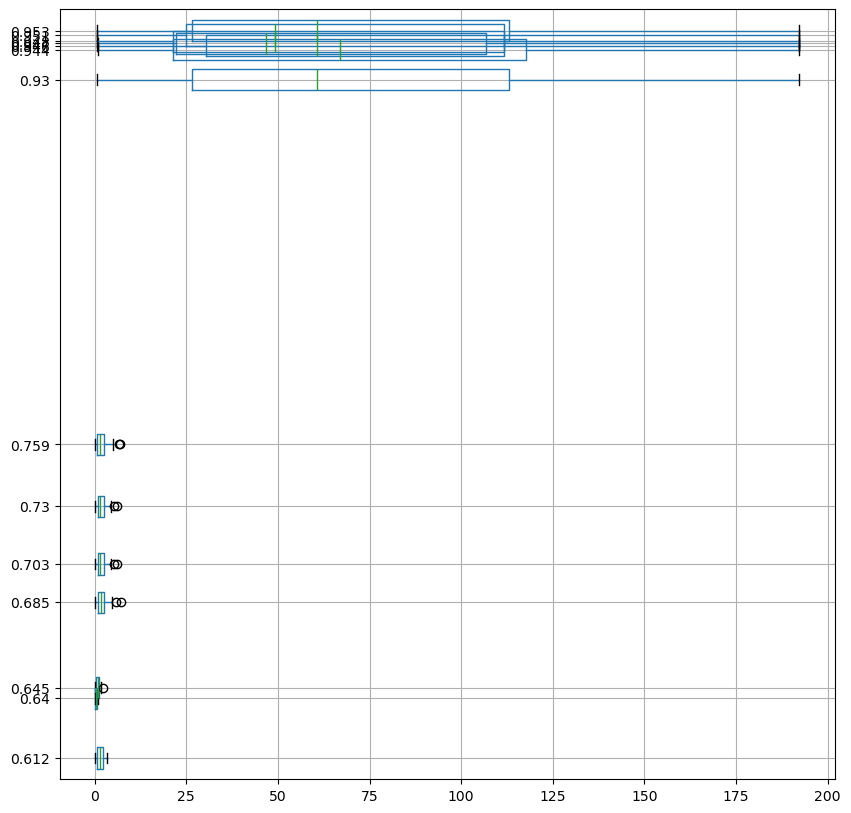

In [65]:
plt.figure(figsize = (10, 10))
pd.DataFrame(KL_data_all, index = df["Quantized Top1 Accuracy"]).T.boxplot(vert = False, positions = df["Quantized Top1 Accuracy"] * 50)

In [66]:
# df["Classes Repeated"] = new_col
# df

In [67]:
df.to_csv("../logs/Quantization_Log_Subsets.csv", index = False)

In [28]:
# Plots

In [69]:
df = pd.read_csv("../logs/Quantization_Log_Subsets.csv")
df.head()

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Seed,Subset_Inds,Subset_Classes,Max_KL,Min_KL,Avg_KL,Classes Repeated,Trained Top1 Accuracy,Trained Top5 Accuracy,Median_KL
0,vgg16,CIFAR100,64,0.887,0.935,0.989,0.991,4,1.16,1.16,...,0,"[0, 39, 12, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'bridge', 'mountain', 'o...",192.253176,0.844140,68.940139,False,0.982,0.999,66.980437
1,vgg16,CIFAR100,64,0.861,0.902,0.987,0.989,4,1.16,1.16,...,0,"[0, 39, 49, 52, 53, 20, 62, 58, 59, 94]","['apple', 'keyboard', 'mountain', 'oak_tree', ...",192.253176,0.844140,69.604010,False,0.955,0.999,66.877609
2,vgg16,CIFAR100,64,0.884,0.960,0.991,0.996,4,1.16,1.16,...,0,"[0, 39, 71, 49, 52, 53, 20, 62, 58, 94]","['apple', 'keyboard', 'sea', 'mountain', 'oak_...",192.253176,0.544018,73.300755,False,0.975,1.000,66.980437
3,vgg16,CIFAR100,64,0.879,0.953,0.987,0.994,4,1.16,1.16,...,0,"[0, 39, 71, 15, 52, 53, 62, 58, 61, 94]","['apple', 'keyboard', 'sea', 'camel', 'oak_tre...",192.253176,0.844140,68.423650,False,0.988,1.000,50.328013
4,vgg16,CIFAR100,64,0.872,0.952,0.986,0.994,4,1.16,1.16,...,0,"[0, 5, 39, 49, 52, 53, 62, 58, 61, 94]","['apple', 'bed', 'keyboard', 'mountain', 'oak_...",192.253176,0.844140,68.367547,False,0.983,1.000,55.650079


In [70]:
from matplotlib import colormaps

cmap = colormaps['rainbow']
cmap(2.5)

(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)

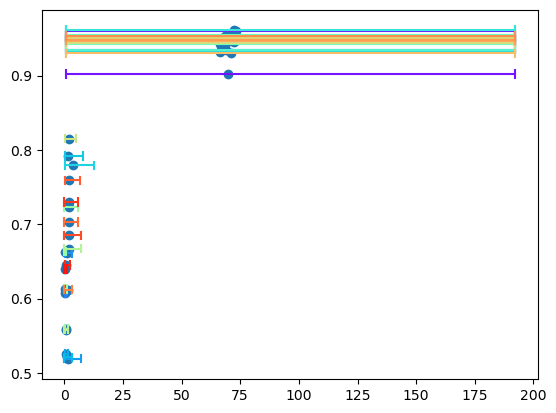

In [71]:
from matplotlib import colormaps

for i in range(df.shape[0]):
    plt.plot(df.iloc[i][["Min_KL", "Max_KL"]], [df.iloc[i]["Quantized Top1 Accuracy"]] * 2, color = cmap(i / df.shape[0]))
    plt.plot([df.iloc[i]["Min_KL"]] * 2, [df.iloc[i]["Quantized Top1 Accuracy"] - 0.005, df.iloc[i]["Quantized Top1 Accuracy"] + 0.005], color = cmap(i / df.shape[0]))
    plt.plot([df.iloc[i]["Max_KL"]] * 2, [df.iloc[i]["Quantized Top1 Accuracy"] - 0.005, df.iloc[i]["Quantized Top1 Accuracy"] + 0.005], color = cmap(i / df.shape[0]))

plt.scatter(df["Avg_KL"], df["Quantized Top1 Accuracy"])

In [72]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return (a * np.log(b * x)) + c

X, y = df["Avg_KL"], df["Quantized Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_1 = []
for i in range(100):
    fitted_line_1 += [func(i, *coefs).item()]

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_213/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [73]:
X, y = df["Avg_KL"], df["Original Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_5 = []
for i in range(100):
    fitted_line_5 += [func(i, *coefs).item()]

/tmp/ipykernel_213/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [74]:
X, y = df["Avg_KL"], df["Trained Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_ = []
for i in range(100):
    fitted_line_ += [func(i, *coefs).item()]

/tmp/ipykernel_213/3828107680.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


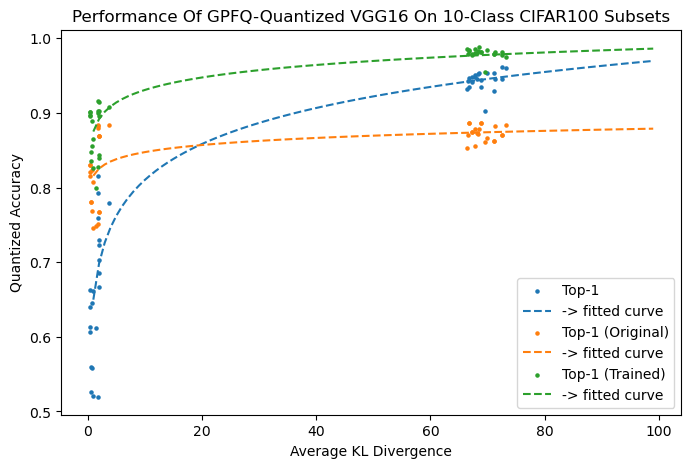

In [75]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Avg_KL"], df["Quantized Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
plt.scatter(df["Avg_KL"], df["Original Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_5)), fitted_line_5, '--')
plt.scatter(df["Avg_KL"], df["Trained Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_)), fitted_line_, '--')
plt.xlabel("Average KL Divergence")
plt.ylabel("Quantized Accuracy")
plt.title("Performance Of GPFQ-Quantized EfficientNet On 10-Class CIFAR100 Subsets", fontsize = 12)
leg = plt.legend(["Top-1", "-> fitted curve", "Top-1 (Original)", "-> fitted curve",  "Top-1 (Trained)", "-> fitted curve"])
plt.savefig("./imgs/vgg16.png")

In [76]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return (a * np.log(b * x)) + c

X, y = df["Median_KL"], df["Quantized Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_1 = []
for i in range(80):
    fitted_line_1 += [func(i, *coefs).item()]

/tmp/ipykernel_213/1040412974.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [77]:
X, y = df["Median_KL"], df["Original Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_5 = []
for i in range(80):
    fitted_line_5 += [func(i, *coefs).item()]

/tmp/ipykernel_213/1040412974.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


In [78]:
X, y = df["Median_KL"], df["Trained Top1 Accuracy"]

coefs, pcov = curve_fit(func, X, y)

fitted_line_ = []
for i in range(80):
    fitted_line_ += [func(i, *coefs).item()]

/tmp/ipykernel_213/1040412974.py:5: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


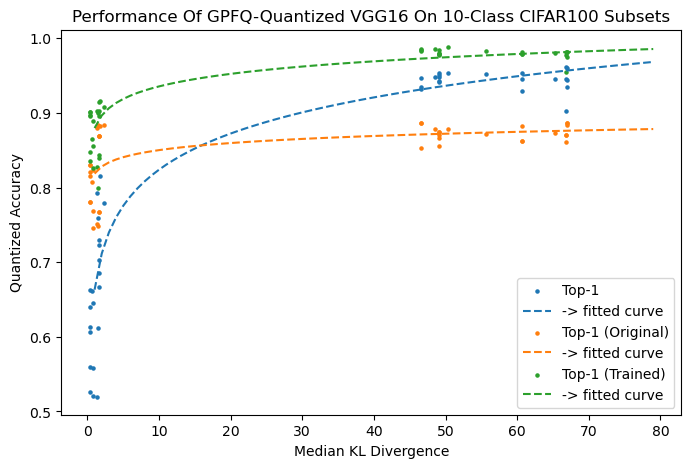

In [79]:
plt.figure(figsize = (8, 5))
plt.scatter(df["Median_KL"], df["Quantized Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
plt.scatter(df["Median_KL"], df["Original Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_5)), fitted_line_5, '--')
plt.scatter(df["Median_KL"], df["Trained Top1 Accuracy"], s = 5)
plt.plot(range(len(fitted_line_)), fitted_line_, '--')
plt.xlabel("Median KL Divergence")
plt.ylabel("Quantized Accuracy")
plt.title("Performance Of GPFQ-Quantized EfficientNet On 10-Class CIFAR100 Subsets", fontsize = 12)
leg = plt.legend(["Top-1", "-> fitted curve", "Top-1 (Original)", "-> fitted curve",  "Top-1 (Trained)", "-> fitted curve"])
plt.savefig("./imgs/vgg16_median.png")